In [1]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [2]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features_ent05.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)
pd.options.display.max_columns = None

### Load the processed features writen in the dataset

In [5]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion', 'Gender'], ascending = (True, True, True))
df = df.set_index('Subject')
df

(1287, 71)


File Gender   Emotion  Emotion_Id  spikes_mel_spect  \
Subject                                                            
1         s1_an_1      m     anger           0              1443   
1         s1_an_2      m     anger           0              1297   
1         s1_an_5      m     anger           0               909   
1         s1_an_4      m     anger           0               898   
1         s1_an_3      m     anger           0              1392   
...           ...    ...       ...         ...               ...   
43       s43_su_1      m  surprise           5               528   
43       s43_su_2      m  surprise           5               617   
43       s43_su_5      m  surprise           5               882   
43       s43_su_4      m  surprise           5               467   
43       s43_su_3      m  surprise           5               832   

         mean_mel_spect  min_mel_spect  max_mel_spect  var_mel_spect  \
Subject                                                                
1              5.470246   4.425599e-10    2683.060303    2835.492676   
1              4.795432   3.266728e-10    1598.459473    1602.659546   
1              6.344573   4.247520e-10    4932.327637    6391.681152   
1              7.300478   3.510179e-10    3062.532715    4610.922363   
1              3.334237   3.032449e-10     689.850098     542.464478   
...                 ...            ...            ...            ...   
43             0.769080   7.201543e-10     343.847076      67.194626   
43             0.556107   5.498184e-10     230.432190      23.537956   
43             0.360079   4.762937e-10     329.025574      26.714954   
43             0.526748   5.340489e-10     276.334412      39.658482   
43             0.683379   5.204142e-10     321.460297      51.769165   

         std_mel_spect  spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Subject                                                                         
1            53.249344                 750          0.402497         0.097249   
1            40.033230                 578          0.369817         0.094729   
1            79.947990                 536          0.312011         0.098784   
1            67.903770                 417          0.272837         0.095383   
1            23.290867                 603          0.402758         0.097614   
...                ...                 ...               ...              ...   
43            8.197233                 387          0.331168         0.106346   
43            4.851593                 396          0.380171         0.100801   
43            5.168651                 831          0.457406         0.093907   
43            6.297498                 407          0.366071         0.108240   
43            7.195079                 662          0.365656         0.103991   

         std_chroma_stft  spikes_rms  mean_rms   max_rms   var_rms   std_rms  \
Subject                                                                        
1               0.311847          83  0.129479  0.340202  0.007750  0.088035   
1               0.307780          64  0.122001  0.275363  0.007222  0.084985   
1               0.314300          61  0.140534  0.410695  0.008144  0.090243   
1               0.308841          58  0.155781  0.308454  0.007771  0.088151   
1               0.312432          57  0.093039  0.258287  0.007551  0.086896   
...                  ...         ...       ...       ...       ...       ...   
43              0.326108          36  0.044888  0.123129  0.001366  0.036966   
43              0.317492          38  0.039031  0.098768  0.001004  0.031681   
43              0.306442          62  0.025236  0.120546  0.000918  0.030292   
43              0.328999          35  0.035316  0.099460  0.001033  0.032139   
43              0.322476          65  0.038733  0.121275  0.001410  0.037548   

         spikes_spec_cent  mean_spec_cent  min_spec_cent  max_spec_cent  \
Subject              

### Min Max Scaling all features
### Store Scaled features in a new file

In [6]:
df_scaled = df.copy(deep=True)
df_scaled[df_scaled.columns[4:]] = minmax_scale(df_scaled[df_scaled.columns[4:]], config.scale_range)
df_scaled.to_csv(SCALED_FEATURES)
df_scaled

File Gender   Emotion  Emotion_Id  spikes_mel_spect  \
Subject                                                            
1         s1_an_1      m     anger           0          0.569663   
1         s1_an_2      m     anger           0          0.507456   
1         s1_an_5      m     anger           0          0.342139   
1         s1_an_4      m     anger           0          0.337452   
1         s1_an_3      m     anger           0          0.547934   
...           ...    ...       ...         ...               ...   
43       s43_su_1      m  surprise           5          0.179804   
43       s43_su_2      m  surprise           5          0.217725   
43       s43_su_5      m  surprise           5          0.330635   
43       s43_su_4      m  surprise           5          0.153813   
43       s43_su_3      m  surprise           5          0.309331   

         mean_mel_spect  min_mel_spect  max_mel_spect  var_mel_spect  \
Subject                                                                
1              0.749187       0.226190       0.543893       0.383464   
1              0.656711       0.166961       0.323958       0.216739   
1              0.869004       0.217088       1.000000       0.864392   
1              1.000000       0.179403       0.620843       0.623567   
1              0.456470       0.154987       0.139710       0.073361   
...                 ...            ...            ...            ...   
43             0.104944       0.368067       0.069548       0.009087   
43             0.075758       0.281009       0.046549       0.003183   
43             0.048894       0.243431       0.066542       0.003613   
43             0.071735       0.272949       0.055857       0.005363   
43             0.093199       0.265981       0.065008       0.007001   

         std_mel_spect  spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Subject                                                                         
1             0.619121            0.369873          0.528081         0.502347   
1             0.465380            0.248232          0.436557         0.461005   
1             0.929704            0.218529          0.274662         0.527540   
1             0.789595            0.134371          0.164950         0.471737   
1             0.270617            0.265912          0.528811         0.508339   
...                ...                 ...               ...              ...   
43            0.095035            0.113154          0.328314         0.651605   
43            0.056115            0.119519          0.465554         0.560636   
43            0.059804            0.427157          0.681863         0.447521   
43            0.072935            0.127298          0.426064         0.682675   
43            0.083377            0.307638          0.424902         0.612957   

         std_chroma_stft  spikes_rms  mean_rms   max_rms   var_rms   std_rms  \
Subject                                                                        
1               0.542307    0.549180  0.827658  0.740815  0.558896  0.742617   
1               0.501253    0.393443  0.778661  0.596441  0.520817  0.716192   
1               0.567064    0.368852  0.900099  0.897775  0.587309  0.761753   
1               0.511963    0.344262  1.000000  0.670123  0.560376  0.743626   
1               0.548213    0.336066  0.588888  0.558420  0.544521  0.732751   
...                  ...         ...       ...       ...       ...       ...   
43              0.686268    0.163934  0.273384  0.257471  0.098221  0.300119   
43              0.599296    0.180328  0.235008  0.203229  0.072039  0.254325   
43              0.487746    0.377049  0.144621  0.251720  0.065830  0.242295   
43              0.715450    0.155738  0.210666  0.204770  0.074147  0.258291   
43              0.649602    0.401639  0.233055  0.253344  0.101353  0.305166   

         spikes_spec_cent  mean_spec_cent  min_spec_cent  max_spec_cent  \
Subject              

## Querying data
### - Group by subject and emotions and calculate the respective mean values

In [5]:
df.groupby(['Subject', 'Emotion']).mean()

Emotion_Id  spikes_mel_spect  mean_mel_spect  \
Subject Emotion                                                   
1       anger             0.0            1187.8        5.448993   
        disgust           1.0            1074.0        2.203773   
        fear              2.0             694.4        2.062133   
        happiness         3.0             896.6        3.596385   
        sadness           4.0             848.2        0.860076   
...                       ...               ...             ...   
43      disgust           1.0             729.4        0.260711   
        fear              2.0             705.4        0.094042   
        happiness         3.0             753.6        0.582320   
        sadness           4.0             724.0        0.048736   
        surprise          5.0             665.2        0.579078   

                   min_mel_spect  max_mel_spect  var_mel_spect  std_mel_spect  \
Subject Emotion                                                                 
1       anger       3.696495e-10    2593.246045    3196.644043      52.885040   
        disgust     3.467299e-10    1275.522034     629.788232      23.311563   
        fear        3.833569e-10    1171.522021     953.791905      24.186283   
        happiness   4.827979e-10    1385.045288    1395.557080      34.941695   
        sadness     3.661279e-10     618.971100      97.350328       9.813401   
...                          ...            ...            ...            ...   
43      disgust     5.670453e-10     170.781540      11.001651       3.229945   
        fear        5.261877e-10      36.785215       1.163915       0.951147   
        happiness   6.273955e-10     247.009872      37.168540       6.034569   
        sadness     4.942486e-10      18.252147       0.321057       0.524530   
        surprise    5.601459e-10     300.219910      41.775037       6.342011   

                   spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Subject Emotion                                                            
1       anger                   576.8          0.351984         0.096752   
        disgust                 618.8          0.396743         0.093006   
        fear                    486.6          0.347003         0.097134   
        happiness               458.2          0.373238         0.093243   
        sadness                 601.2          0.405850         0.090979   
...                               ...               ...              ...   
43      disgust                 616.6          0.381820         0.099958   
        fear                    642.2          0.390809         0.096705   
        happiness               504.6          0.341275         0.099516   
        sadness                 869.0          0.460991         0.093024   
        surprise                536.6          0.380094         0.102657   

                   std_chroma_stft  spikes_rms  mean_rms   max_rms   var_rms  \
Subject Emotion                                                                
1       anger             0.311040        64.6  0.128167  0.318600  0.007688   
        disgust           0.304841        58.6  0.073791  0.238742  0.004279   
        fear              0.311592        47.8  0.069430  0.207824  0.003320   
        happiness         0.305329        45.2  0.101833  0.269219  0.005938   
        sadness           0.301580        50.4  0.043551  0.163463  0.001864   
...                            ...         ...       ...       ...       ...   
43      disgust           0.315976        47.8  0.023073  0.093629  0.000618   
        fear              0.310918        53.6  0.013943  0.047123  0.000211   
        happiness         0.315345        50.6  0.038977  0.113213  0.001051   
        sadness           0.304795        56.0  0.008912  0.037030  0.000124   
        surprise          0.320303        47.2  0.036641  0.112636  0.001146   

                    std_rms  spikes_spec_cent  mean_spec_cent  

### Group by emotions and calculate the respective mean values

In [6]:
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

Emotion_Id  spikes_mel_spect  mean_mel_spect  min_mel_spect  \
Emotion                                                                  
anger             0.0       1245.544186        1.964557   4.979867e-10   
disgust           1.0        931.069767        1.085537   5.411402e-10   
fear              2.0        814.655814        1.103661   5.532539e-10   
happiness         3.0        913.702830        1.685392   5.488081e-10   
sadness           4.0        845.883721        0.438325   5.317130e-10   
surprise          5.0        887.655814        1.179027   5.742985e-10   

           max_mel_spect  var_mel_spect  std_mel_spect  spikes_chroma_stft  \
Emotion                                                                      
anger         784.429963     471.027281      16.464125          685.218605   
disgust       484.715439     223.896929      10.423483          595.116279   
fear          473.599533     299.937834      10.902051          591.413953   
happiness     696.771334     459.780437      15.531277          536.094340   
sadness       236.838715      56.091219       4.620724          672.353488   
surprise      494.933238     247.988765      11.071986          560.353488   

           mean_chroma_stft  var_chroma_stft  std_chroma_stft  spikes_rms  \
Emotion                                                                     
anger              0.372403         0.097257         0.311668   66.665116   
disgust            0.392498         0.095145         0.308083   51.613953   
fear               0.371906         0.099828         0.315678   54.037209   
happiness          0.382702         0.096982         0.311198   49.433962   
sadness            0.403042         0.096040         0.309560   53.613953   
surprise           0.392663         0.096507         0.310371   49.404651   

           mean_rms   max_rms   var_rms   std_rms  spikes_spec_cent  \
Emotion                                                               
anger      0.067751  0.186791  0.003282  0.052550         56.809302   
disgust    0.046428  0.150122  0.002195  0.041711         50.409302   
fear       0.044939  0.133087  0.001957  0.037523         52.227907   
happiness  0.060792  0.174511  0.003112  0.050433         43.882075   
sadness    0.026262  0.096562  0.000925  0.025569         62.441860   
surprise   0.047921  0.145681  0.002259  0.041957         46.479070   

           mean_spec_cent  min_spec_cent  max_spec_cent  var_spec_cent  \
Emotion                                                                  
anger         2000.811022     935.102182    4541.812272   6.544800e+05   
disgust       2386.889376    1008.590783    5050.869427   1.036177e+06   
fear          2259.412909     970.138469    4667.565268   9.174119e+05   
happiness     2266.210799     982.841109    5223.781807   1.074844e+06   
sadness       2250.769442     913.779333    4935.935068   9.730957e+05   
surprise      2087.606349     907.819169    4750.272760   8.709477e+05   

           std_spec_cent  spikes_spec_bw  mean_spec_bw  min_spec_bw  \
Emotion                                                               
anger         769.738216       62.669767   1924.474804  1140.468203   
disgust       972.417513       59.348837   2107.383754  1244.436851   
fear          897.527882       58.474419   2096.777359  1307.379800   
happiness     989.227236       51.509434   2018.206253  1190.985533   
sadness       955.332257       69.493023   2148.438671  1252.886533   
surprise      889.565790       52.130233   2020.029361  1212.959342   

           max_spec_bw    var_spec_bw  std_spec_bw  spikes_spec_rolloff  \
Emotion                                                                   
anger      2918.597177  227955.467216   469.181777            59.004651   
disgust    3058.695844  233803.210362   472.867316            59.325581   
fear       2903.757311  193248.335354   426.119048            59.009302   
happiness  2993.764102  243739.177511   483.187689            49.98584

### Group by genders and emotions and calculate the respective mean values

In [7]:
df.groupby(['Gender', 'Emotion']).mean()

Emotion_Id  spikes_mel_spect  mean_mel_spect  min_mel_spect  \
Gender Emotion                                                                  
f      anger             0.0       1147.371429        1.558979   4.267508e-10   
       disgust           1.0        866.400000        1.182824   4.532641e-10   
       fear              2.0        693.628571        1.044689   4.432154e-10   
       happiness         3.0        913.657143        1.561080   4.550542e-10   
       sadness           4.0        707.485714        0.355731   4.421617e-10   
       surprise          5.0        925.457143        1.232838   4.529828e-10   
m      anger             0.0       1264.633333        2.043419   5.118381e-10   
       disgust           1.0        943.644444        1.066620   5.582272e-10   
       fear              2.0        838.188889        1.115127   5.746503e-10   
       happiness         3.0        913.711864        1.709974   5.673470e-10   
       sadness           4.0        872.794444        0.454385   5.491258e-10   
       surprise          5.0        880.305556        1.168564   5.978876e-10   

                  max_mel_spect  var_mel_spect  std_mel_spect  \
Gender Emotion                                                  
f      anger         691.905863     348.394819      14.157091   
       disgust       544.668524     291.174059      11.936068   
       fear          502.422195     281.898442      11.358913   
       happiness     651.055508     300.951370      13.921807   
       sadness       265.794107      50.762778       4.786785   
       surprise      567.863805     215.933457      12.175114   
m      anger         802.420760     494.872482      16.912715   
       disgust       473.057895     210.815264      10.129369   
       fear          467.995126     303.445493      10.813217   
       happiness     705.811186     491.187314      15.849534   
       sadness       231.208501      57.127305       4.588435   
       surprise      480.752295     254.221741      10.857489   

                  spikes_chroma_stft  mean_chroma_stft  var_chroma_stft  \
Gender Emotion                                                            
f      anger              690.457143          0.353810         0.102787   
       disgust            607.885714          0.379628         0.101620   
       fear               594.342857          0.345696         0.105885   
       happiness          532.714286          0.367950         0.100811   
       sadness            678.171429          0.364209         0.105090   
       surprise           620.200000          0.367681         0.100988   
m      anger              684.200000          0.376018         0.096182   
       disgust            592.633333          0.395001         0.093886   
       fear               590.844444          0.377002         0.098650   
       happiness          536.762712          0.385619         0.096224   
       sadness            671.222222          0.410593         0.094280   
       surprise           548.716667          0.397521         0.095636   

                  std_chroma_stft  spikes_rms  mean_rms   max_rms   var_rms  \
Gender Emotion                                                                
f      anger             0.320405   66.085714  0.058261  0.175101  0.002928   
       disgust           0.318401   52.028571  0.048030  0.157437  0.002454   
       fear              0.325125   53.828571  0.043606  0.139277  0.002022   
       happiness         0.317319   49.428571  0.060598  0.173126  0.003138   
       sadness           0.324015   53.257143  0.024020  0.099505  0.000838   
       surprise          0.317538   52.885714  0.049529  0.165257  0.002651   
m      anger             0.309969   66.777778  0.069597  0.189065  0.003350   
       disgust           0.306077   51.533333  0.046117  0.148700  0.002145   
       fear              0.313841   54.077778  0.045199  0.131883  0.001944   
       happiness         0.309987   49.435028  0.060

## Feature Analysis

### Bar Plots of Mel Spectogram Values

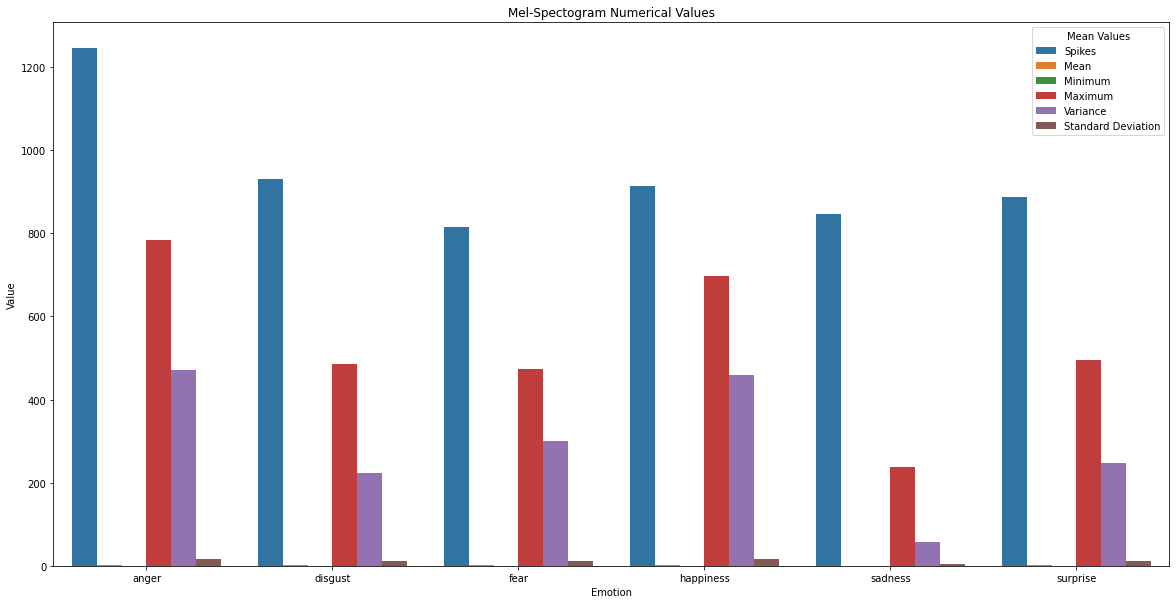

In [8]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spikes"]*6+["Mean"]*6+["Minimum"]*6+["Maximum"]*6+["Variance"]*6+["Standard Deviation"]*6,
        list(emotion_df['spikes_mel_spect'].values)+list(emotion_df['mean_mel_spect'].values)+\
        list(emotion_df['min_mel_spect'].values)+list(emotion_df['max_mel_spect'].values)+\
        list(emotion_df['var_mel_spect'].values)+list(emotion_df['std_mel_spect'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 10))
plt.title("Mel-Spectogram Numerical Values")
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of Spectral Values

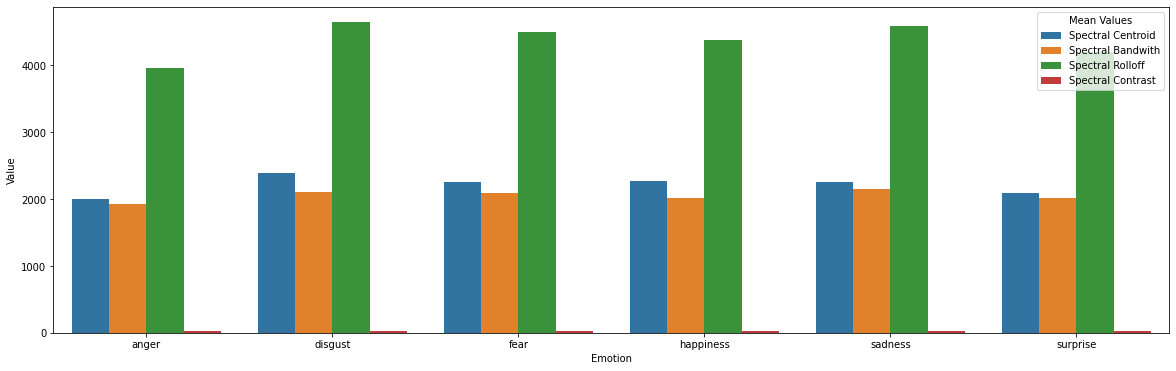

In [9]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spectral Centroid"]*6+["Spectral Bandwith"]*6+
            ["Spectral Rolloff"]*6+["Spectral Contrast"]*6,
        list(emotion_df['mean_spec_cent'].values)+list(emotion_df['mean_spec_bw'].values)+\
            list(emotion_df['mean_spec_rolloff'].values)+list(emotion_df['mean_spec_cont'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of other Features

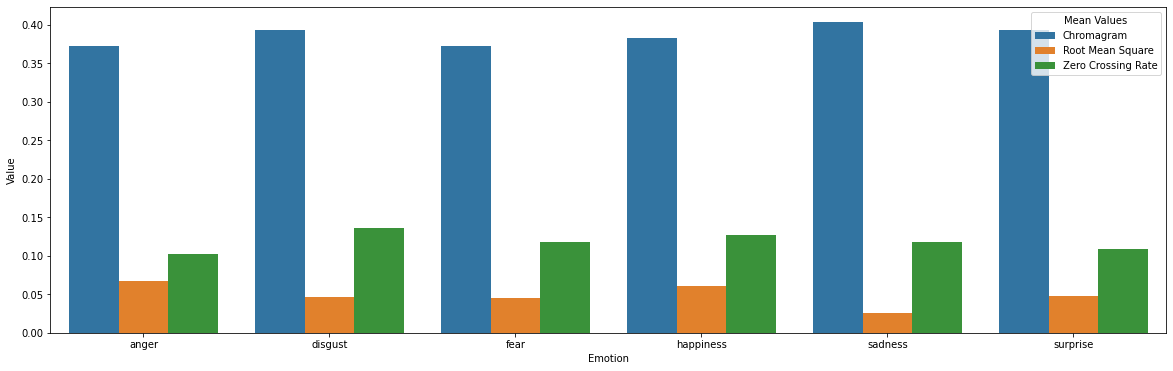

In [10]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['mean_chroma_stft'].values)+list(emotion_df['mean_rms'].values)+list(emotion_df['mean_zcr'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of MFCC Values

# Single Feature Analysis

In [11]:
def analyse_feature(df, feature):
    fig = plt.figure(figsize=(20, 11))
    fig.suptitle(feature, fontsize=18)

    grid = plt.GridSpec(3, 6, wspace=.6, hspace=.4)
    # y_ticks = np.arange(0.0, 1.1, 0.1)

    ax = plt.subplot(grid[0, :])
    ax.set_title("For All Subjects")
    sns.boxplot(x=df["Emotion"], y=df[feature], width=0.3, ax=ax)
    # ax.set_yticks(y_ticks)

    for i in range(1,6):
        if i < 3:
            r, c_s, c_f = 1, (i-1)*3, (i-1)*3+3
        else:
            r, c_s, c_f = 2, (i-3)*2, (i-3)*2+2

        ax = plt.subplot(grid[r, c_s:c_f])
        ax.set_title(f"For Subject {i}")
        subj_data = df.loc[df.index == i]
        sns.boxplot(x=subj_data["Emotion"], y=subj_data[feature], width=0.3, ax=ax);
        # ax.set_yticks(y_ticks)

    plt.show()

## Zero Crossing Rate Analysis
## Unnormalized data
### Mean Metric

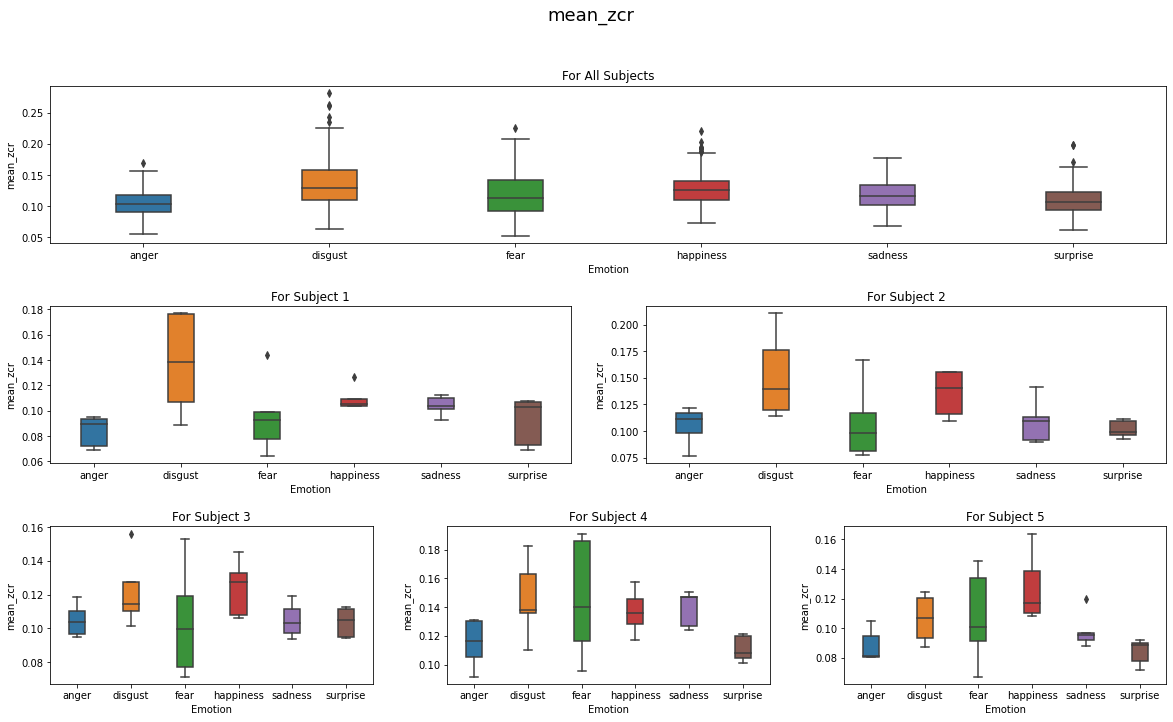

In [12]:
analyse_feature(df, "mean_zcr")

### Variance Metric

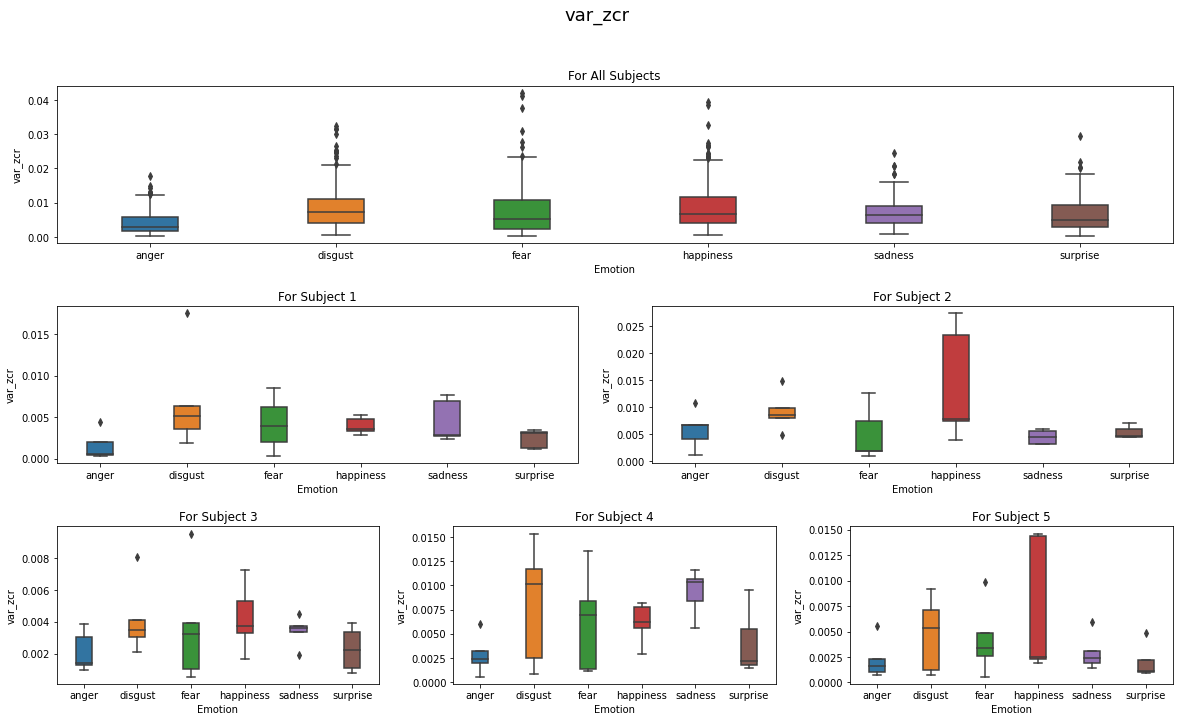

In [13]:
analyse_feature(df, "var_zcr")

### Standard Deviation Metric

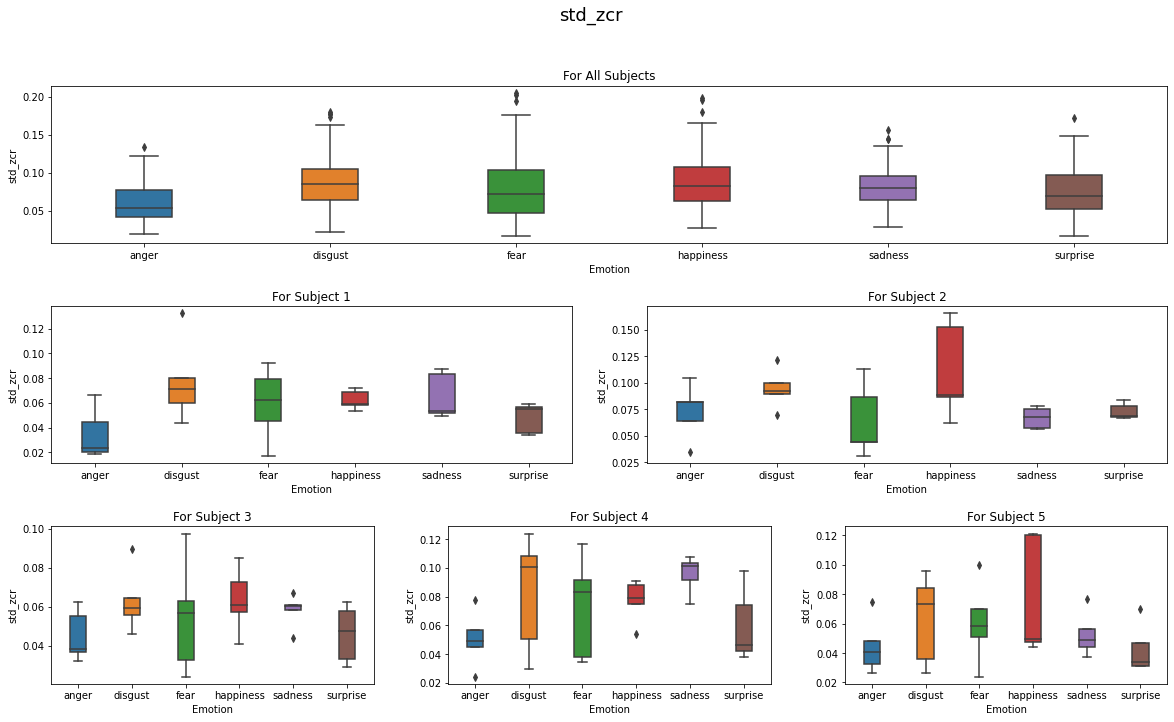

In [14]:
analyse_feature(df, "std_zcr")

### Number of Spikes Metric

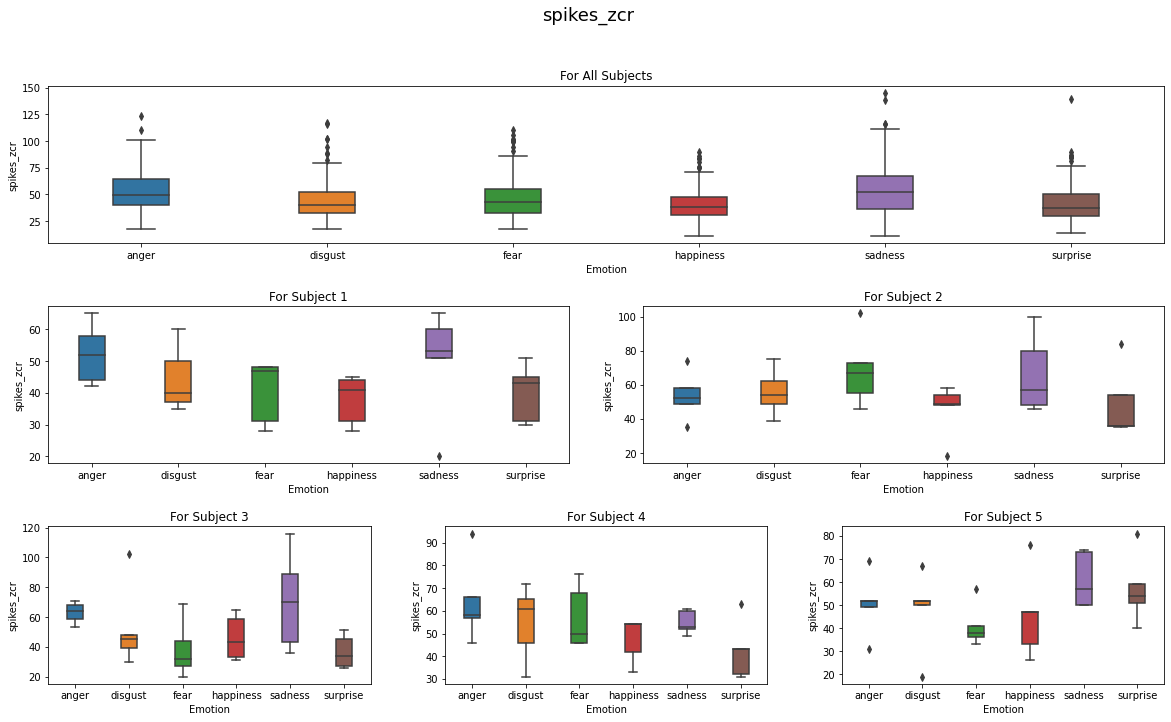

In [15]:
analyse_feature(df, "spikes_zcr")

### Sum Metric

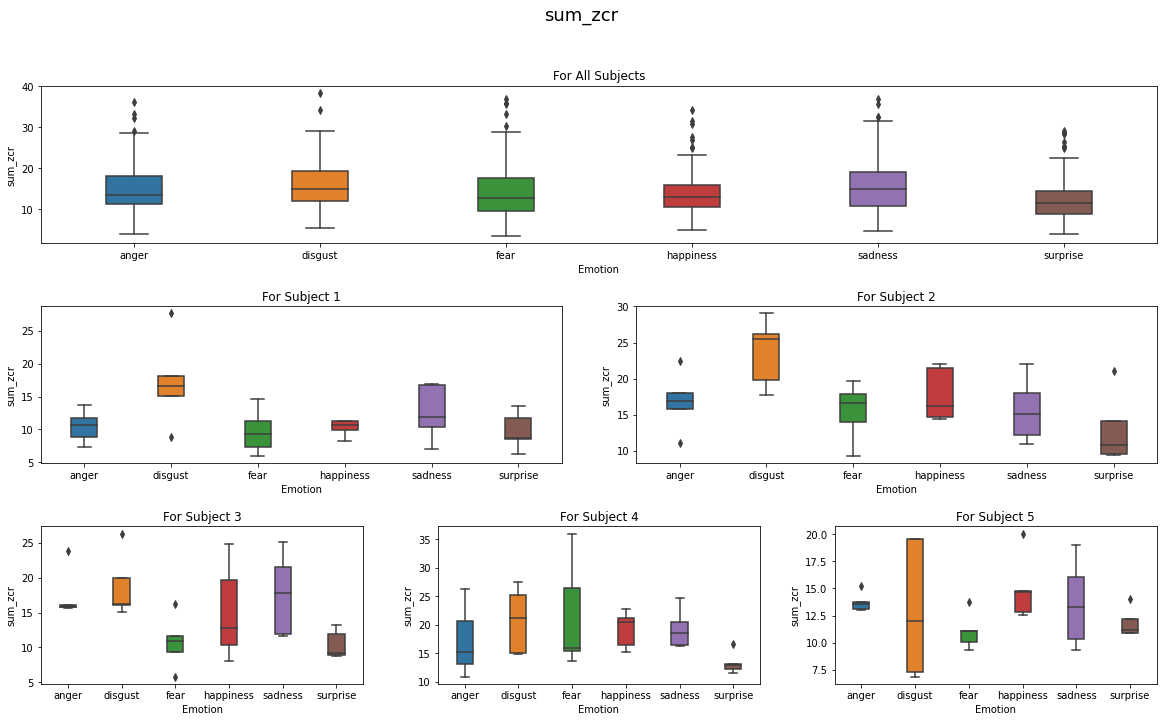

In [16]:
analyse_feature(df, "sum_zcr")

### Variation for different emotions

In [17]:
def step_plot(df, num_utterances, feature):
    emotions = ['anger', 'happiness', 'sadness', 'disgust', 'fear', 'surprise']
    
    fig = plt.figure(figsize=(15, 6))
    fig.suptitle(f"{feature} variation for different emotions", fontsize=16)
    plt.xlabel("Number of the speech utterance")
    plt.ylabel(feature)

    x = list(range(1, num_utterances+1, 1))
    for i, emotion in enumerate(emotions):
        plt.plot(x, df.loc[df['Emotion'] == emotion][feature][:num_utterances], 'o-', label=emotion)
    plt.legend()
    plt.show()

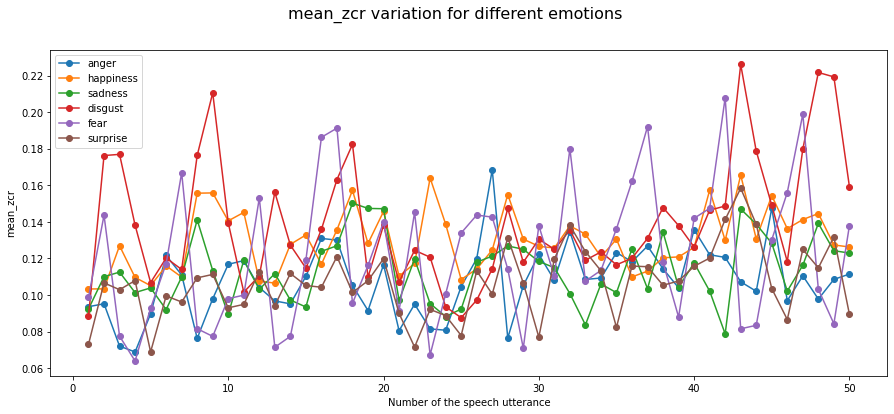

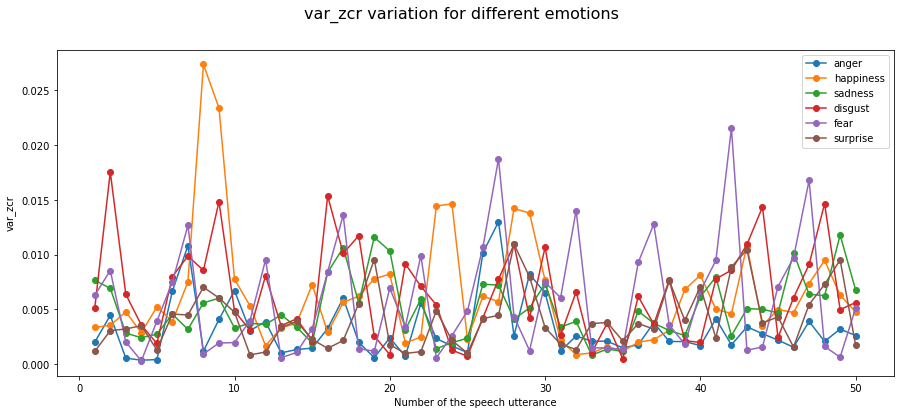

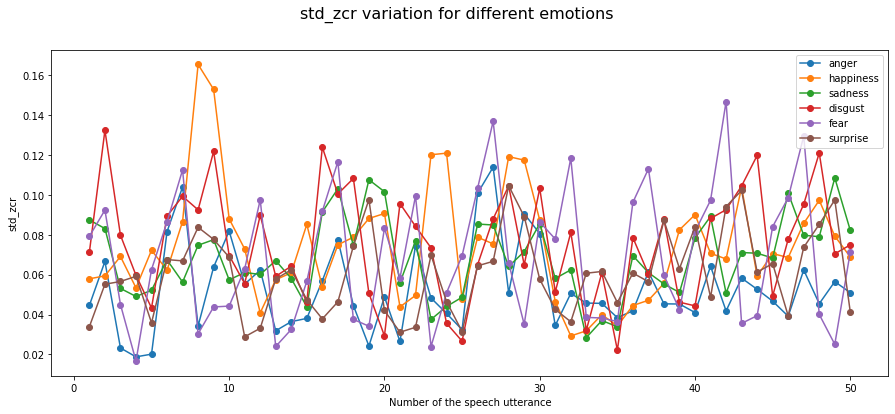

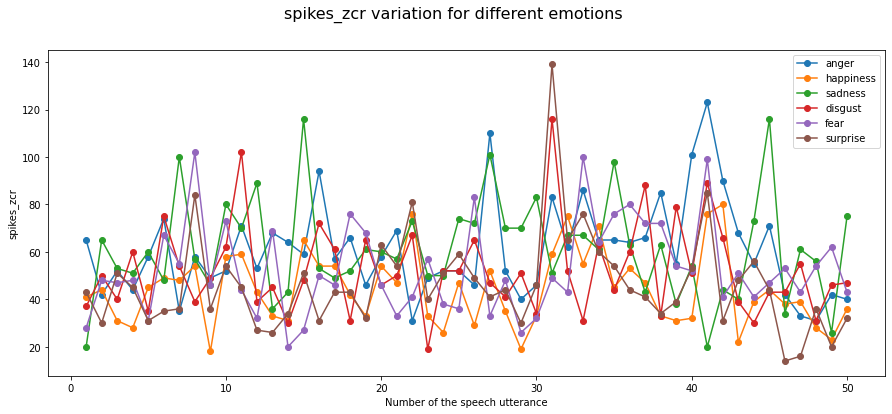

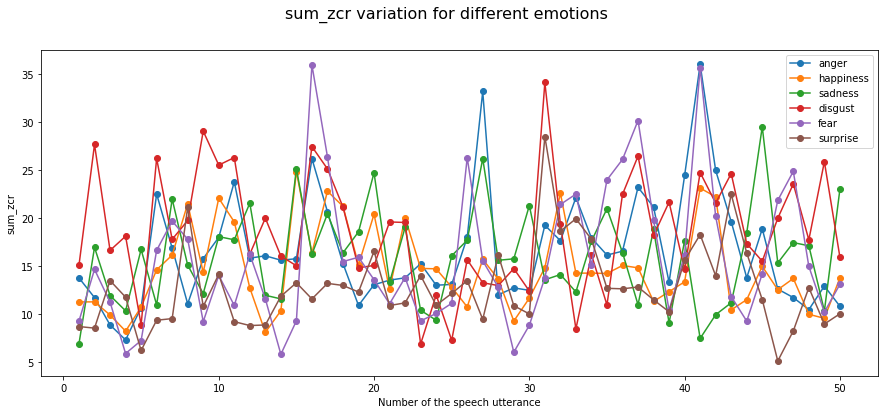

In [18]:
step_plot(df, 50, "mean_zcr")
step_plot(df, 50, "var_zcr")
step_plot(df, 50, "std_zcr")
step_plot(df, 50, "spikes_zcr")
step_plot(df, 50, "sum_zcr")

## All Features Box Plots

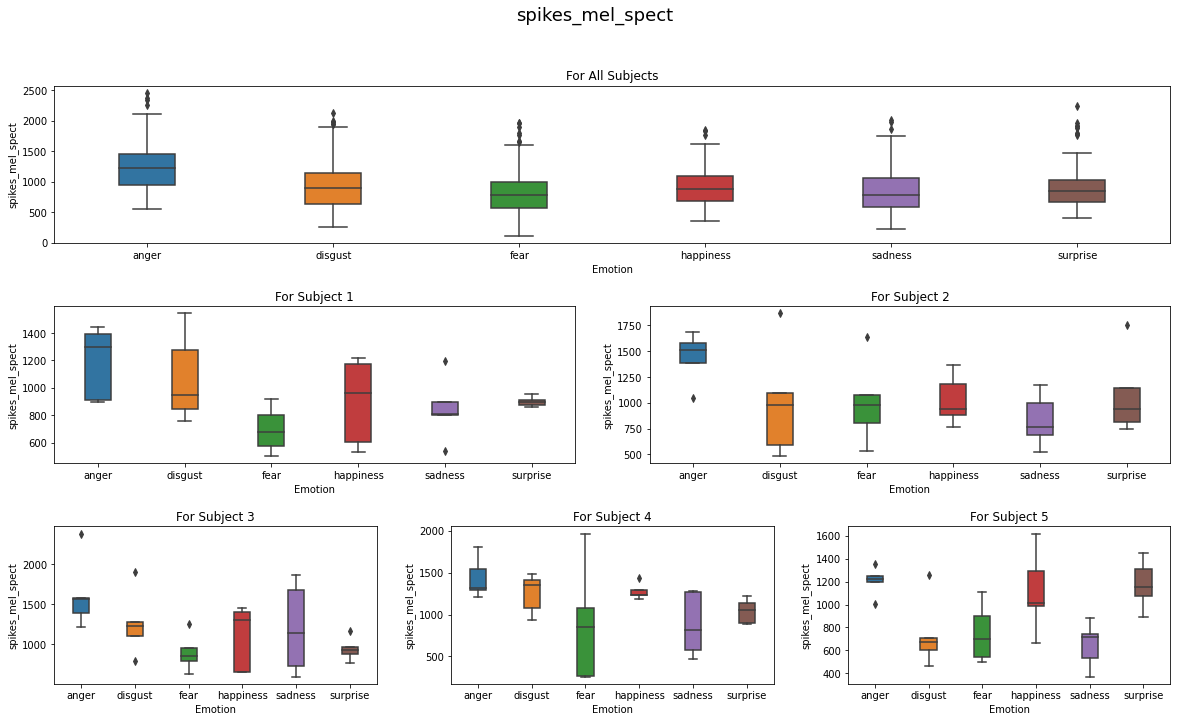

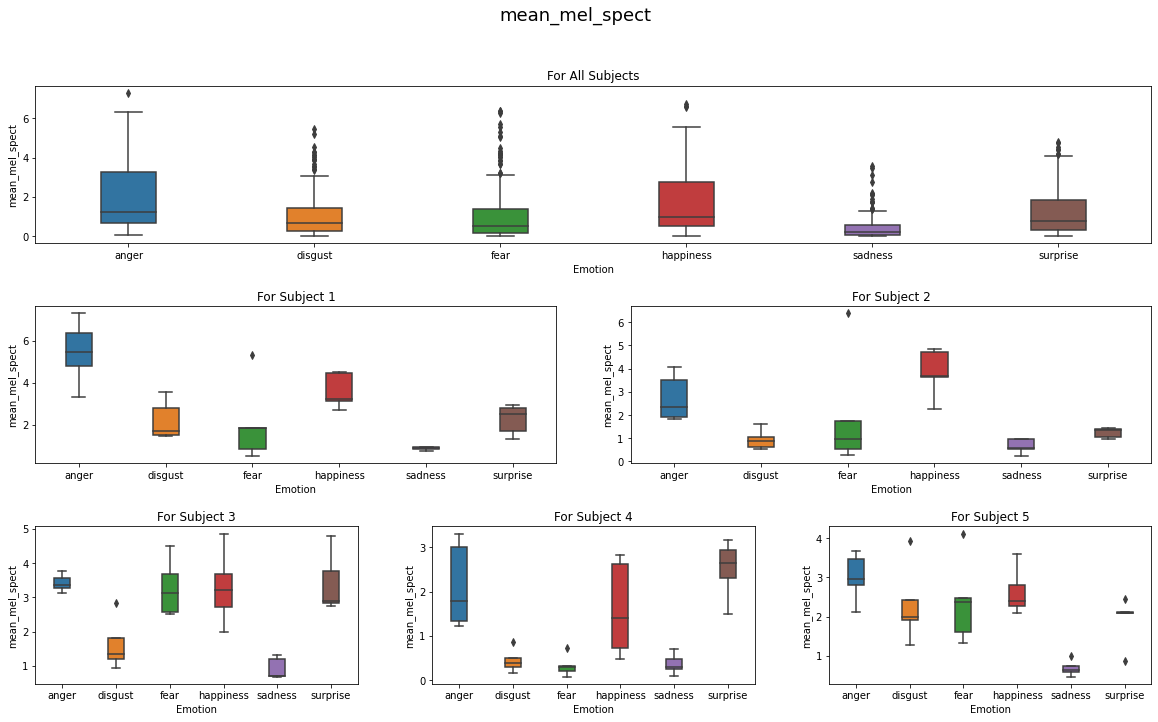

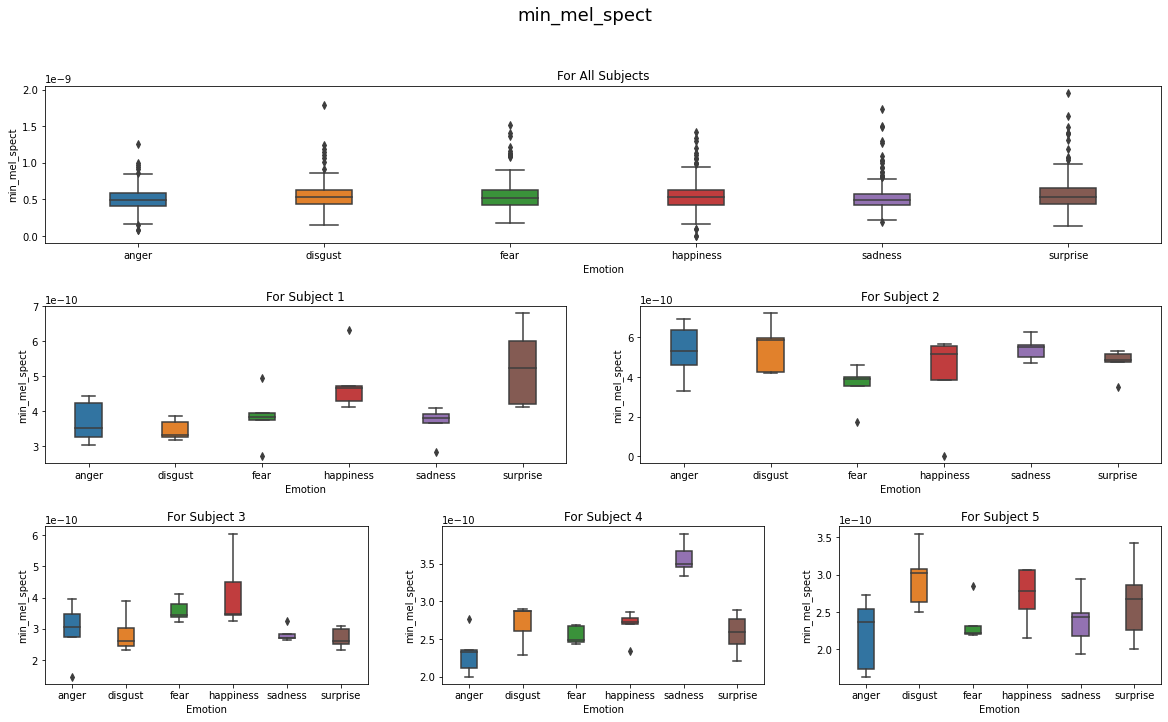

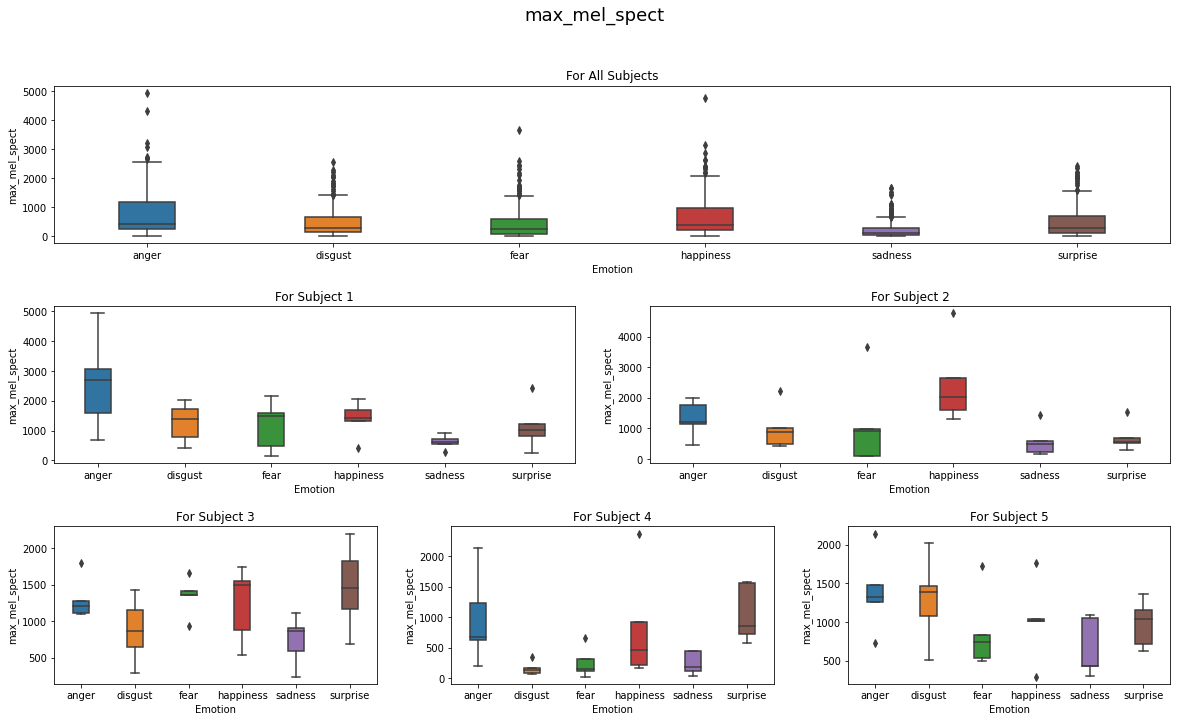

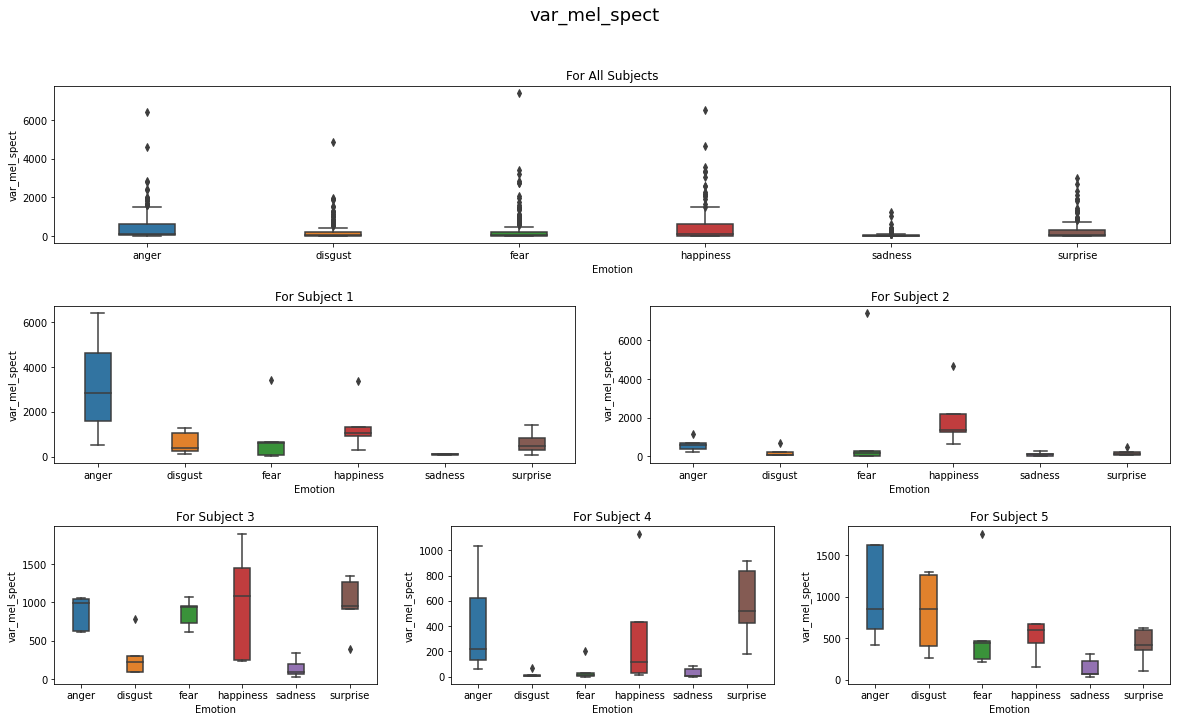

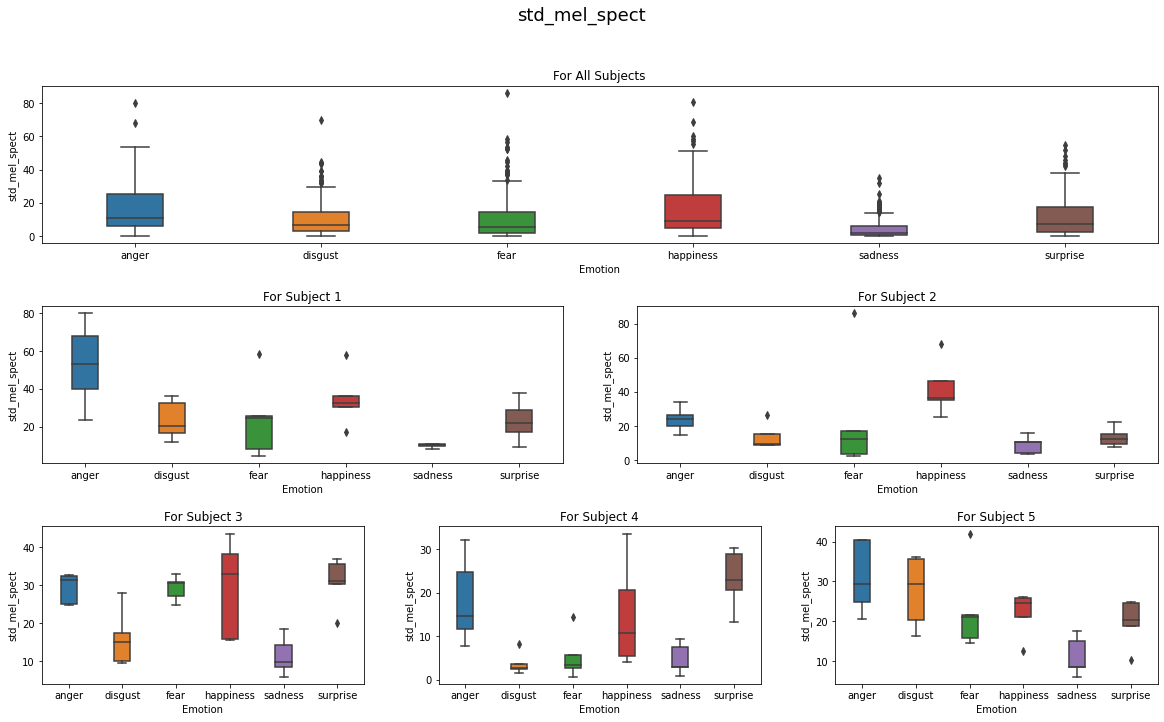

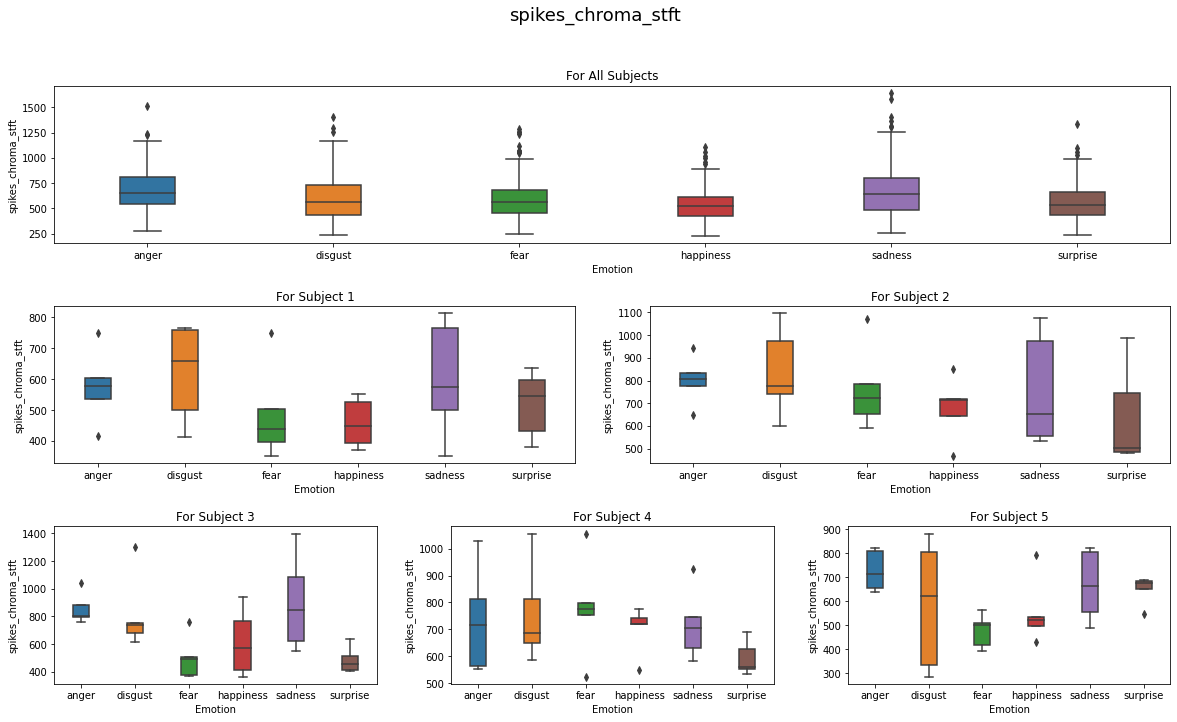

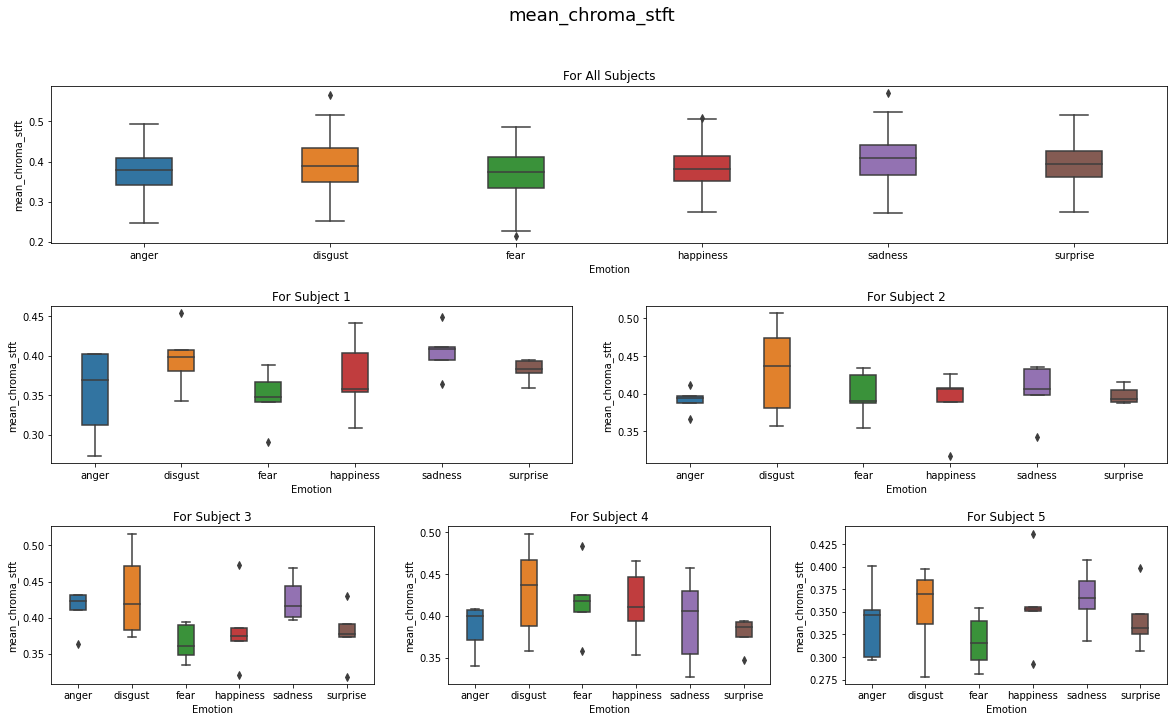

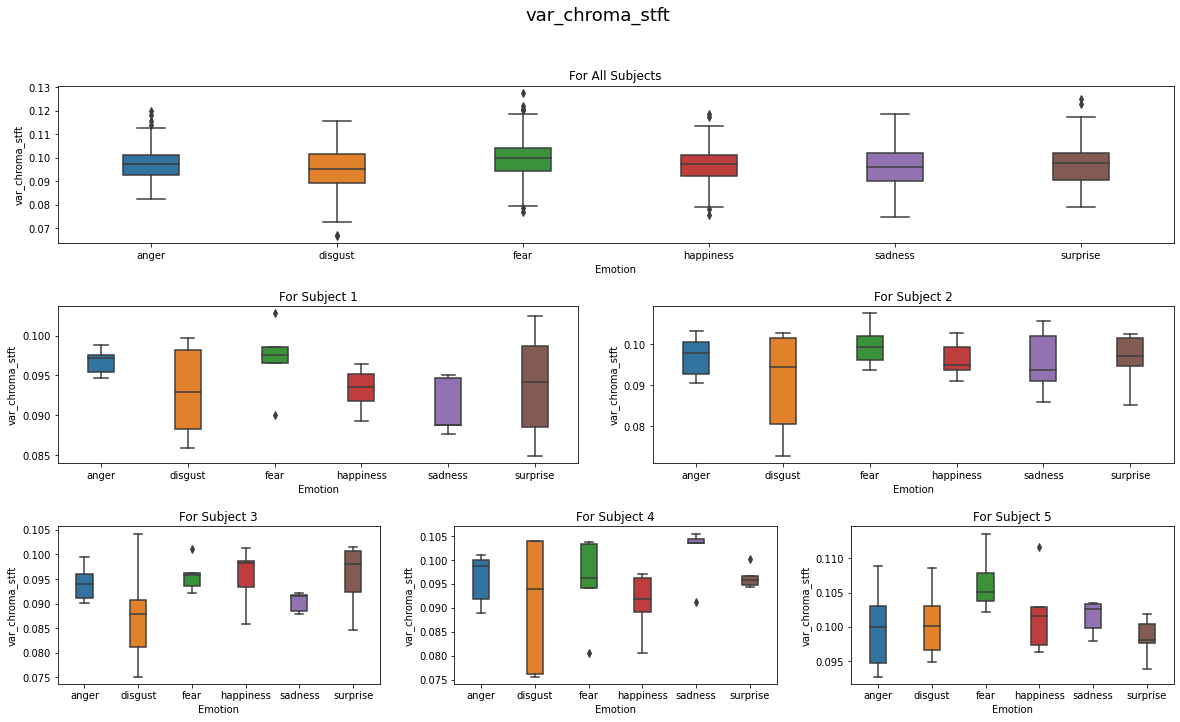

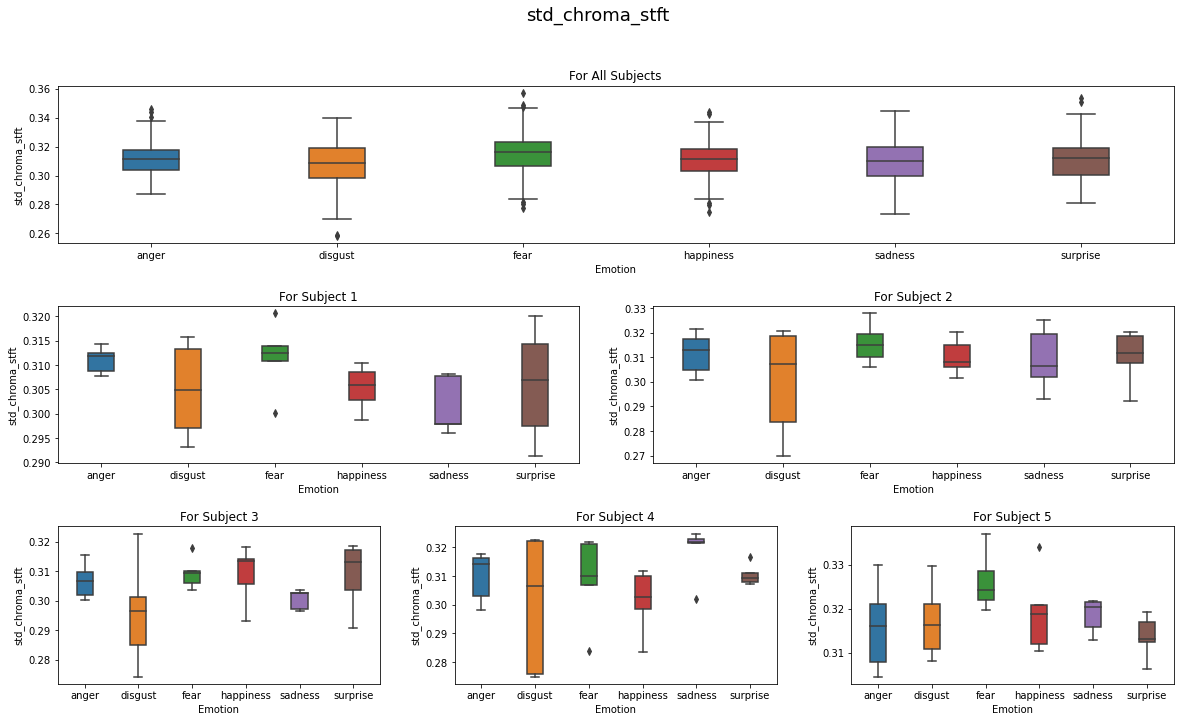

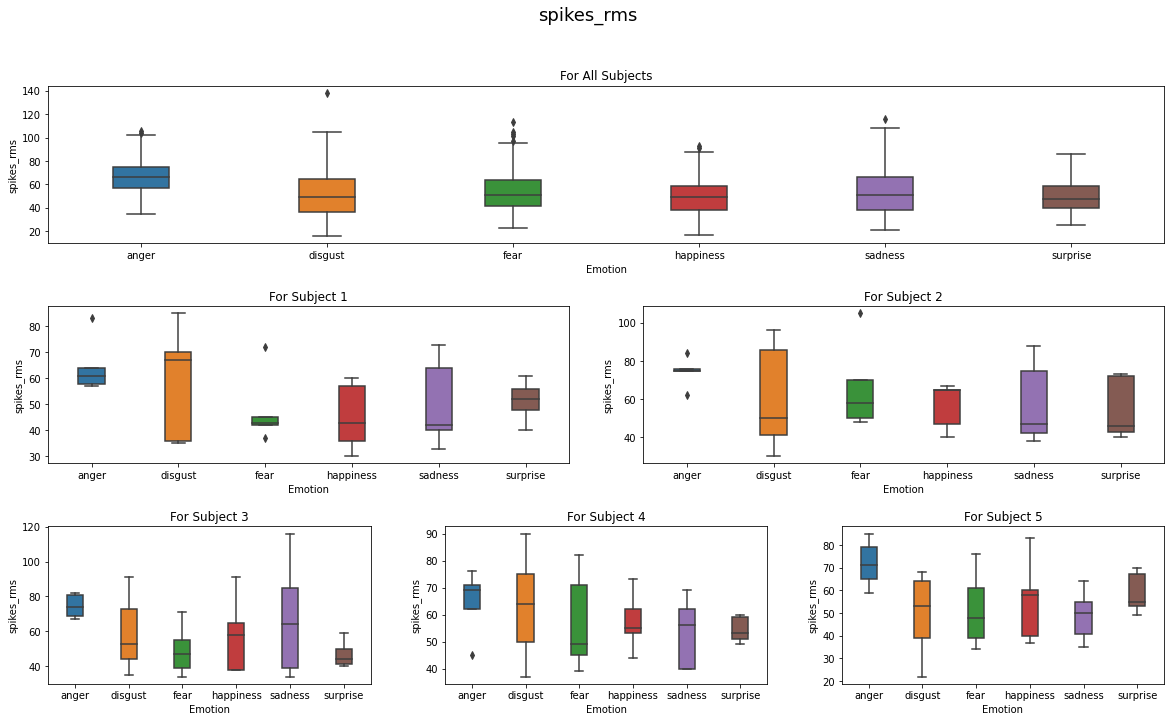

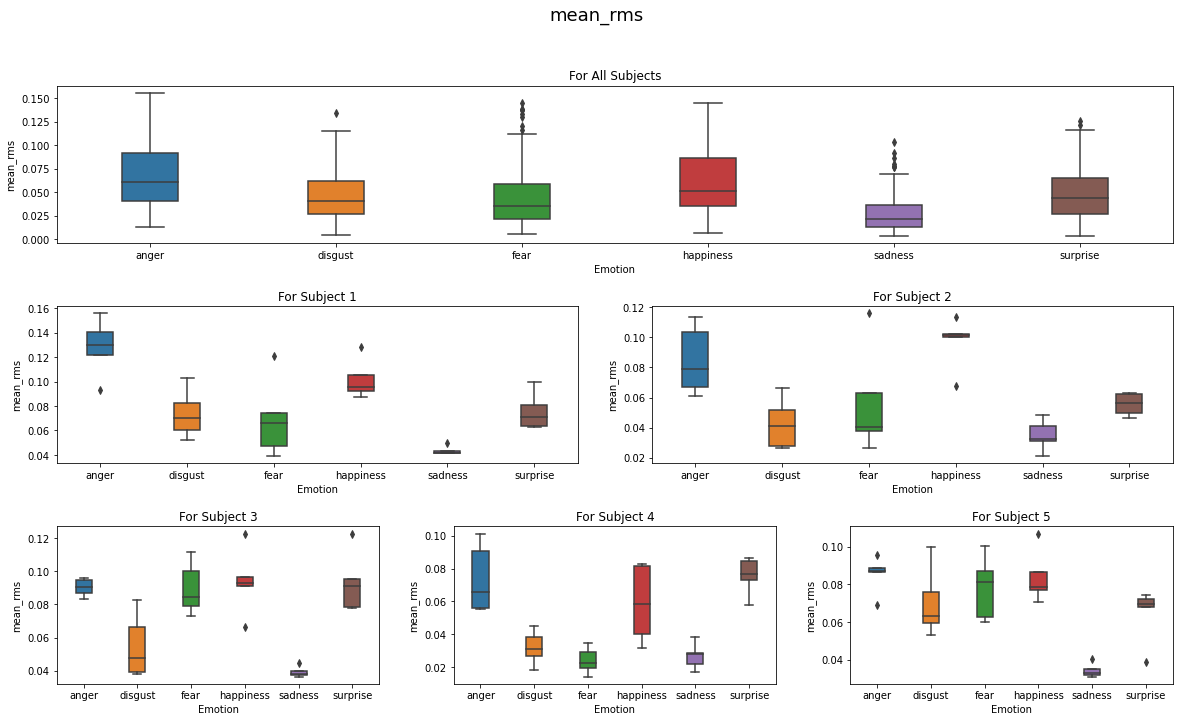

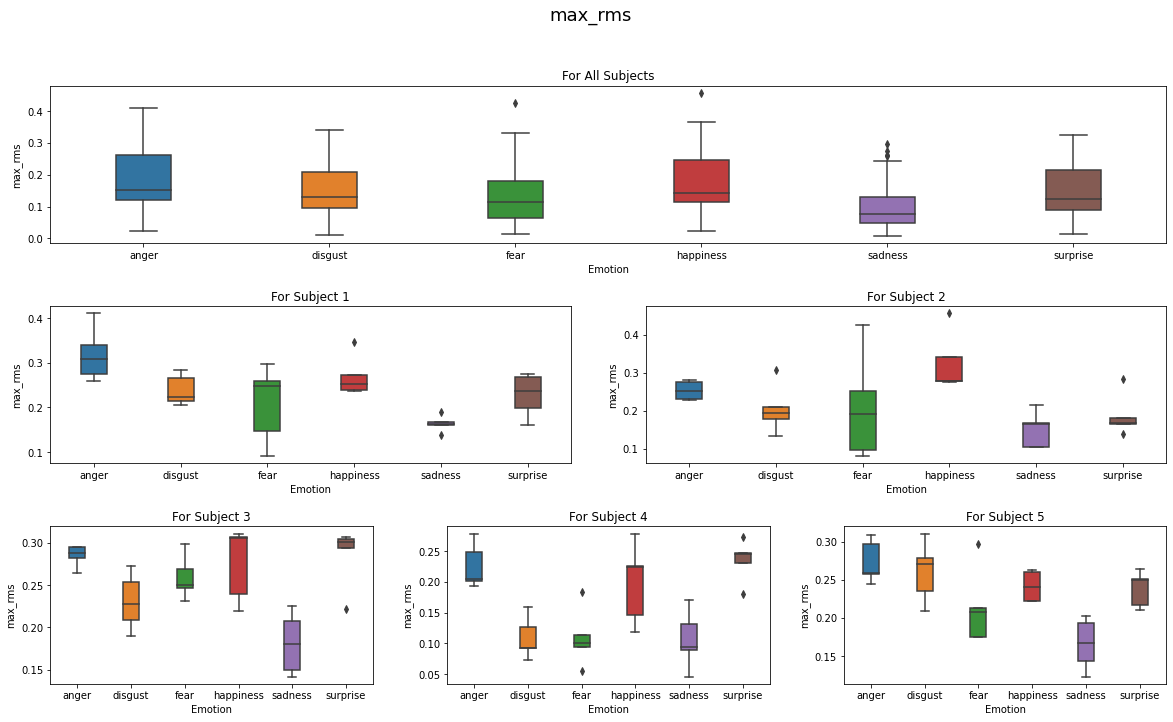

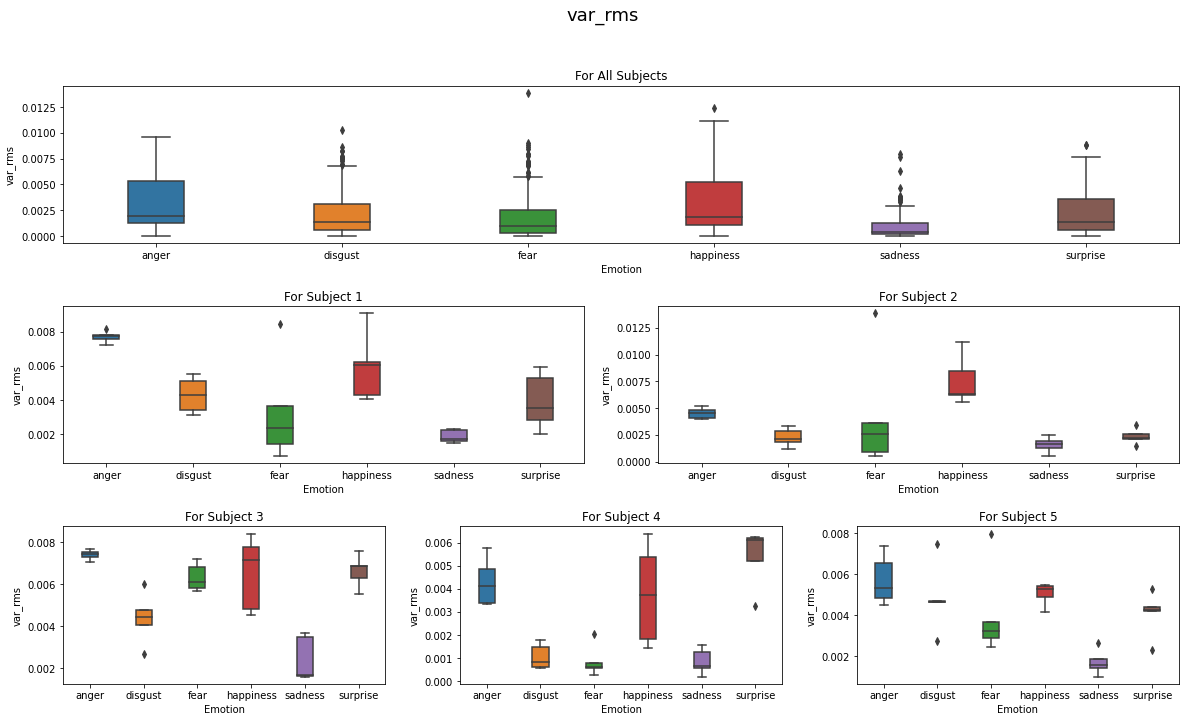

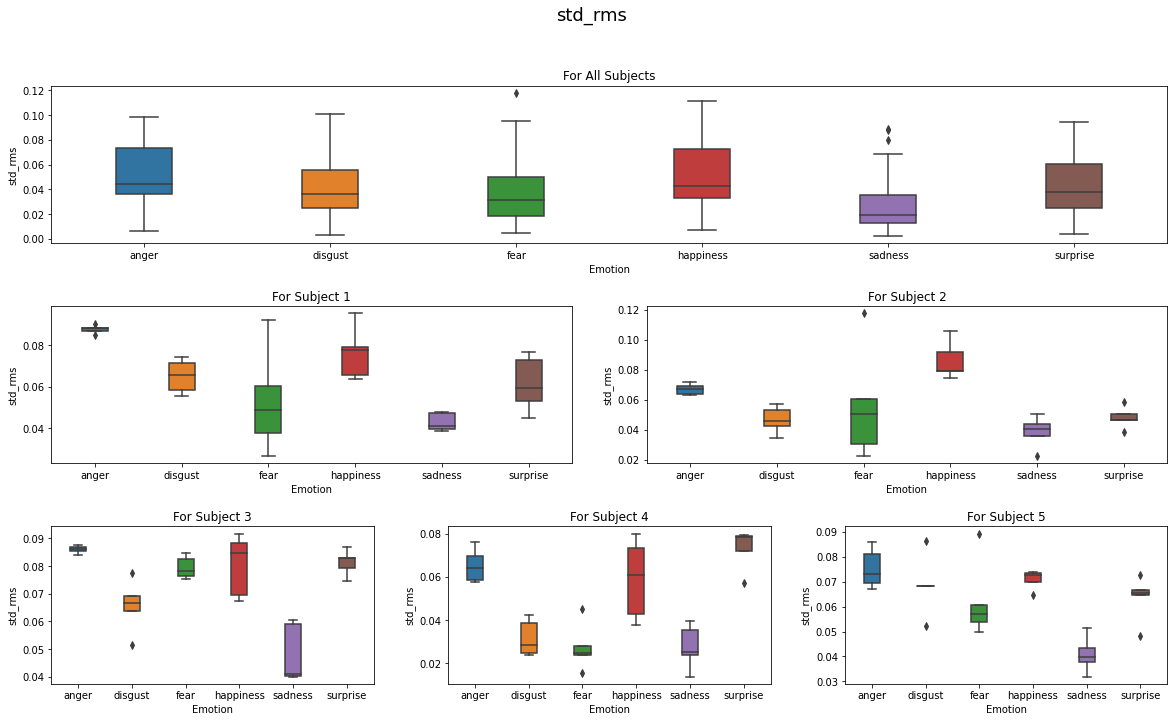

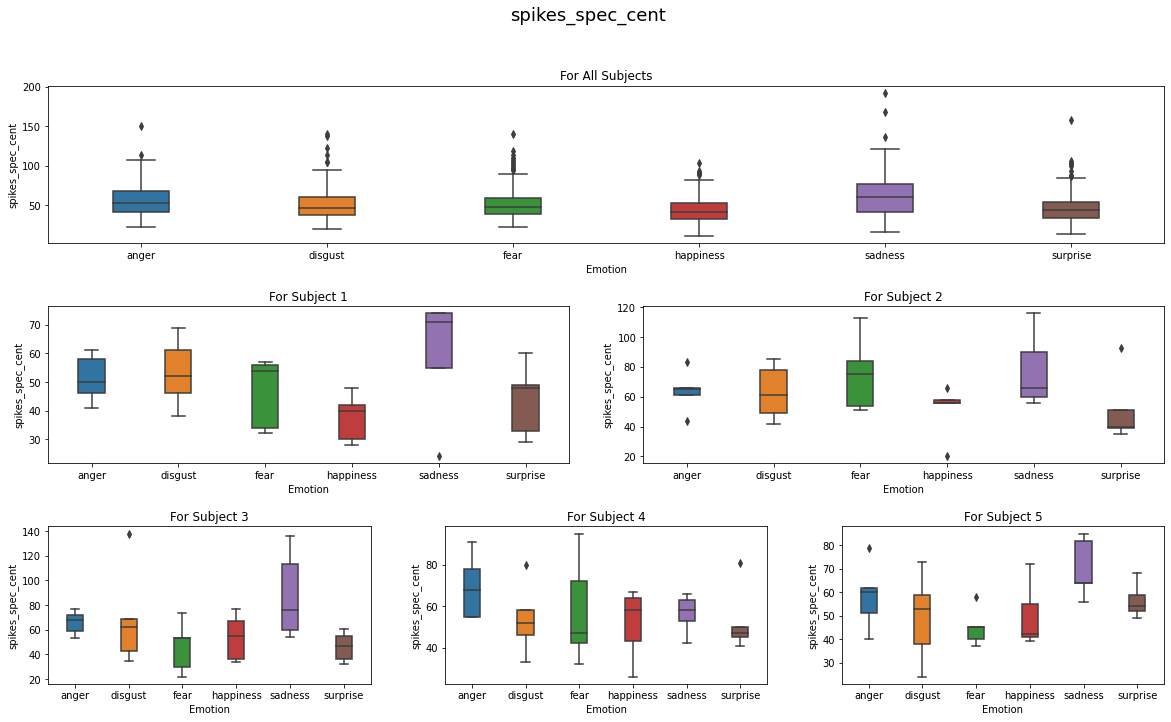

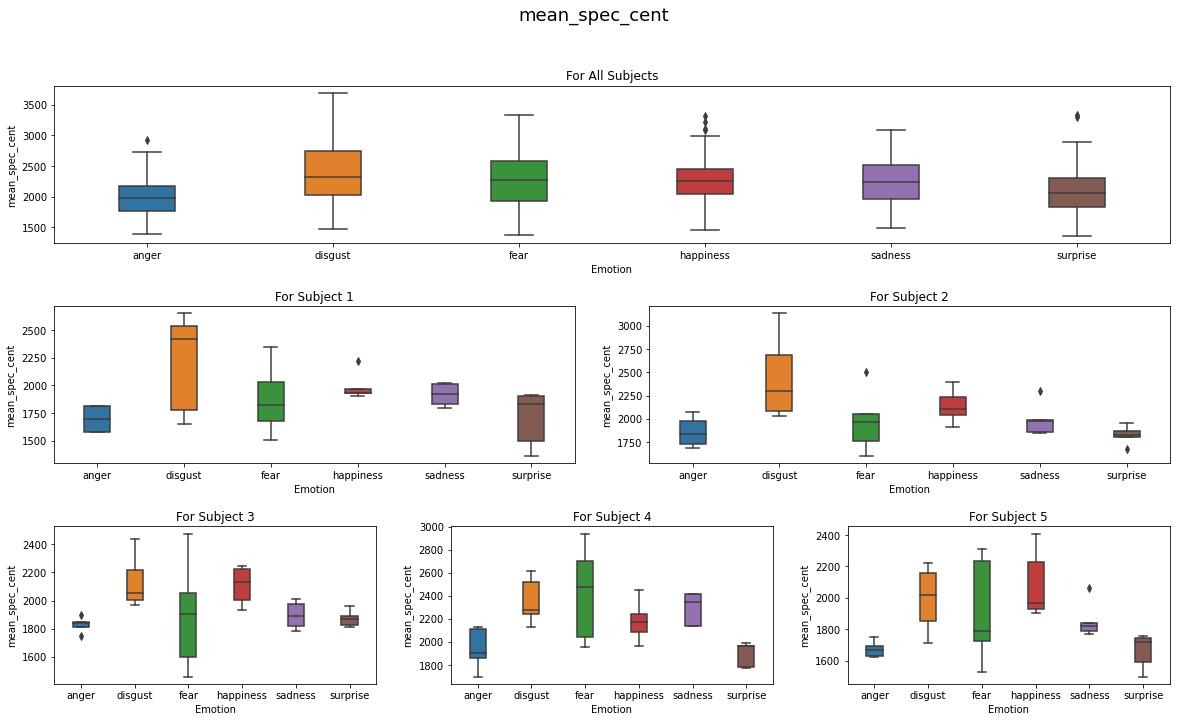

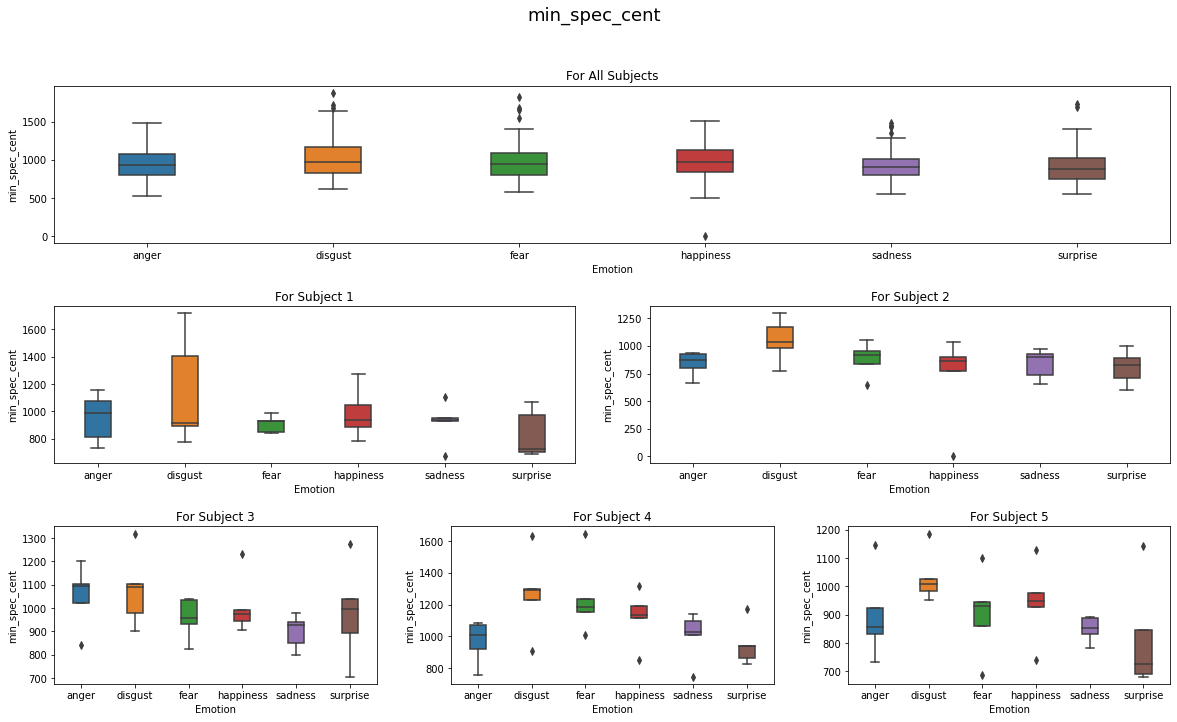

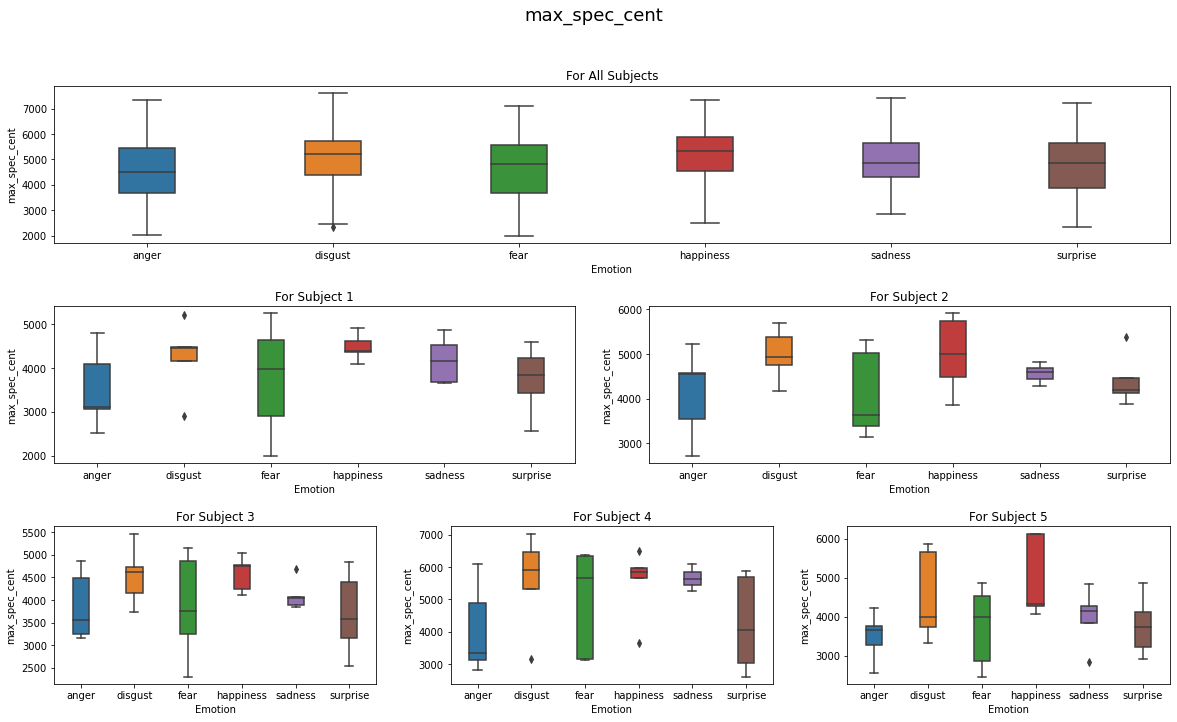

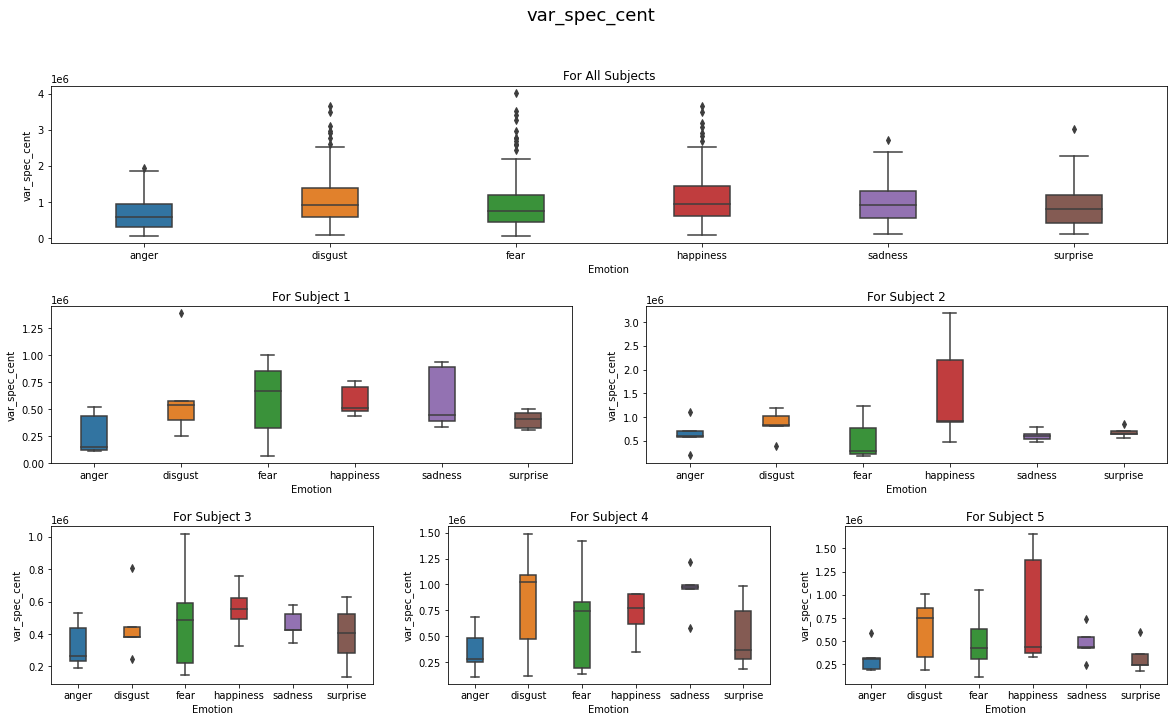

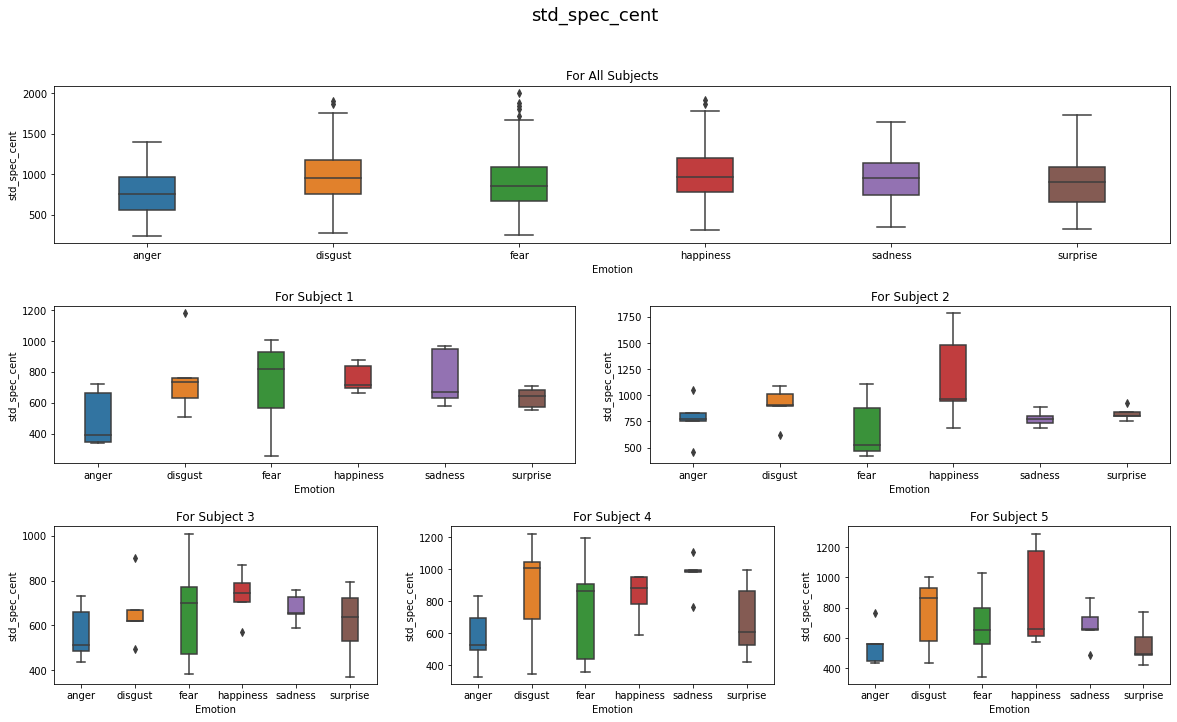

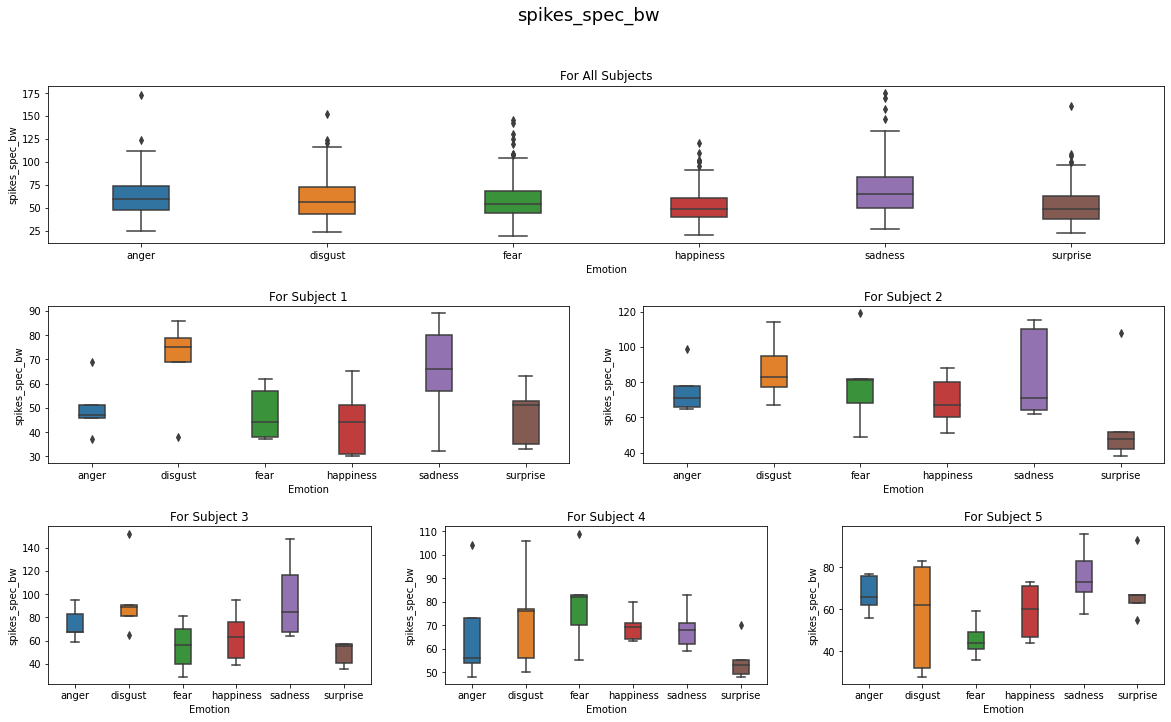

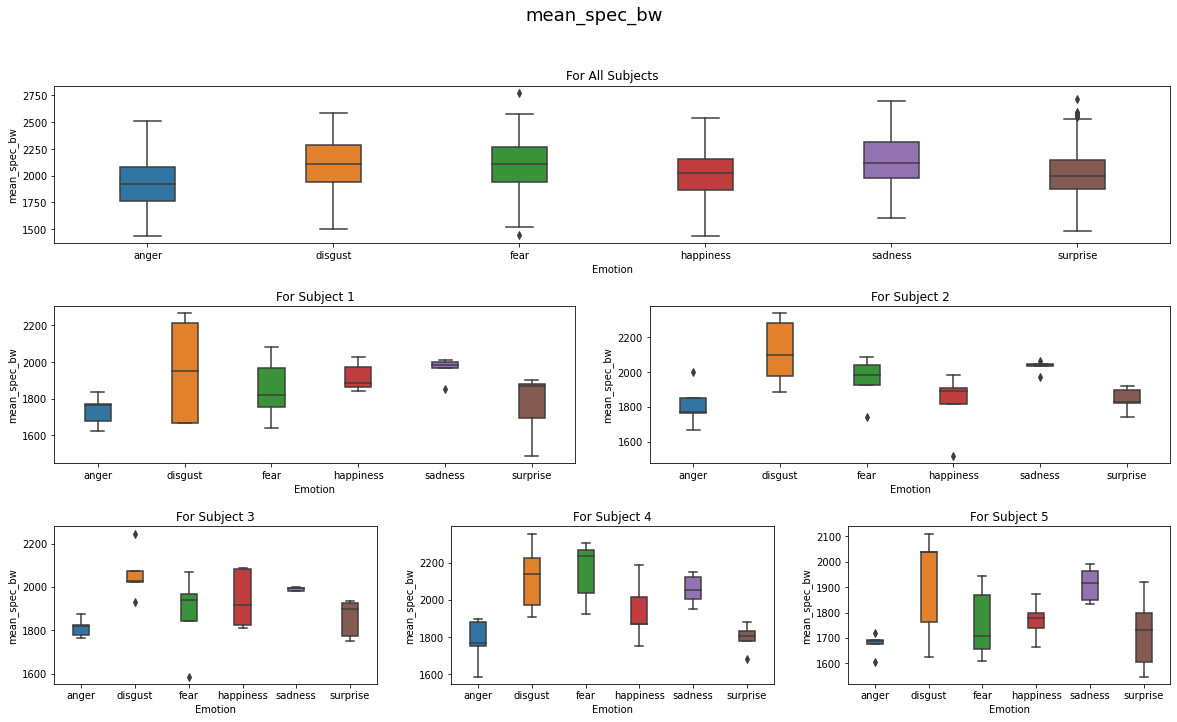

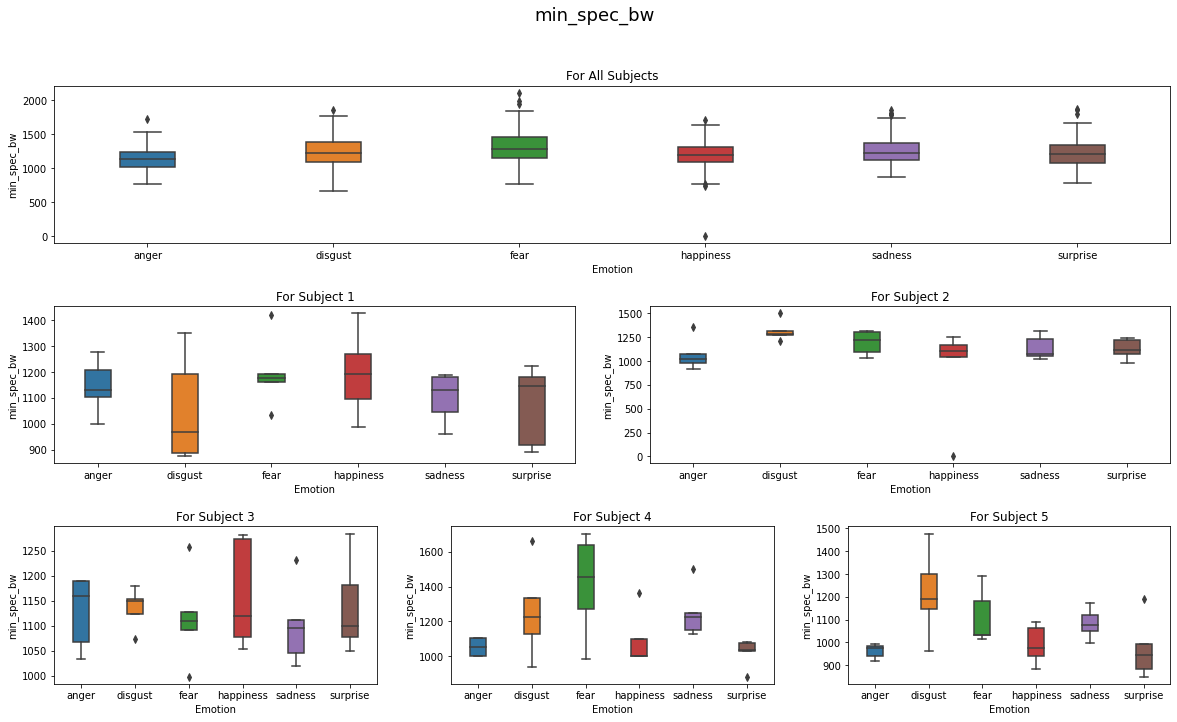

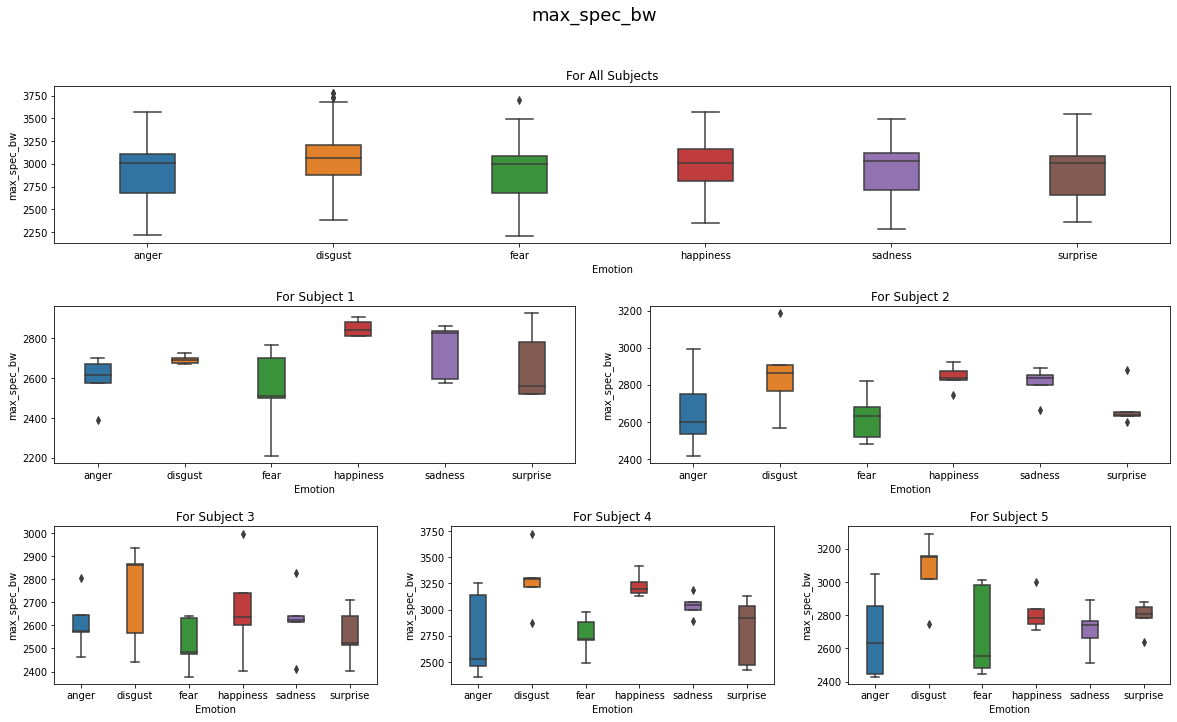

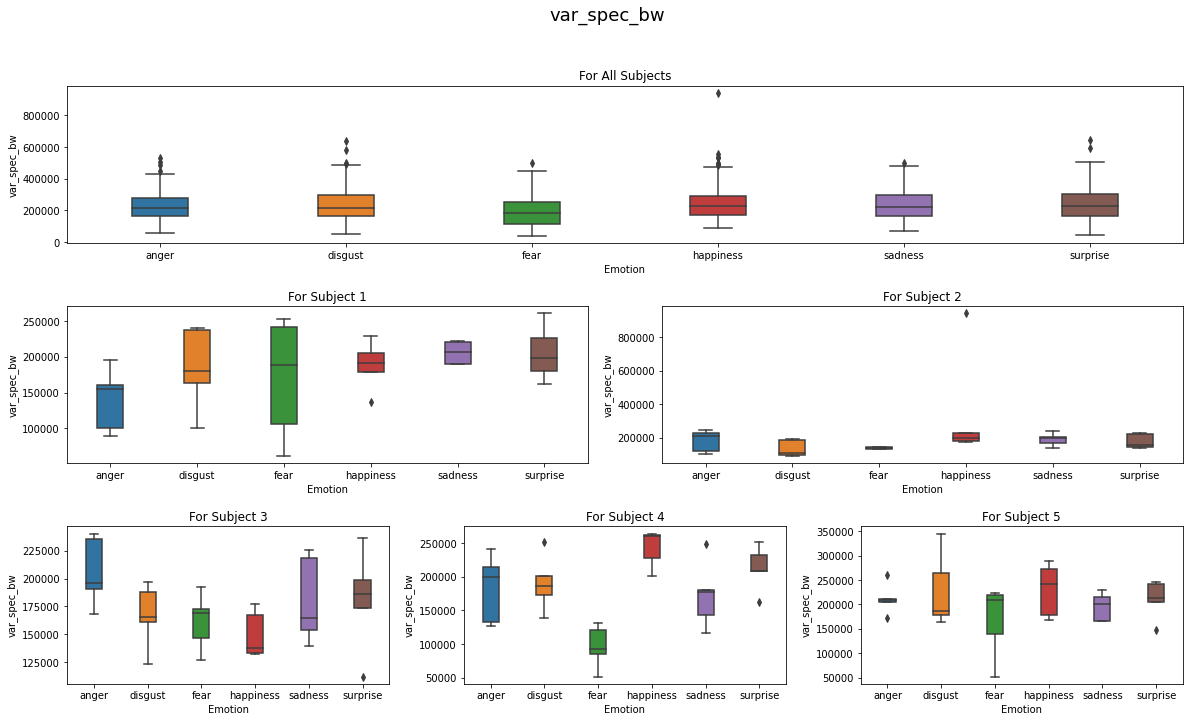

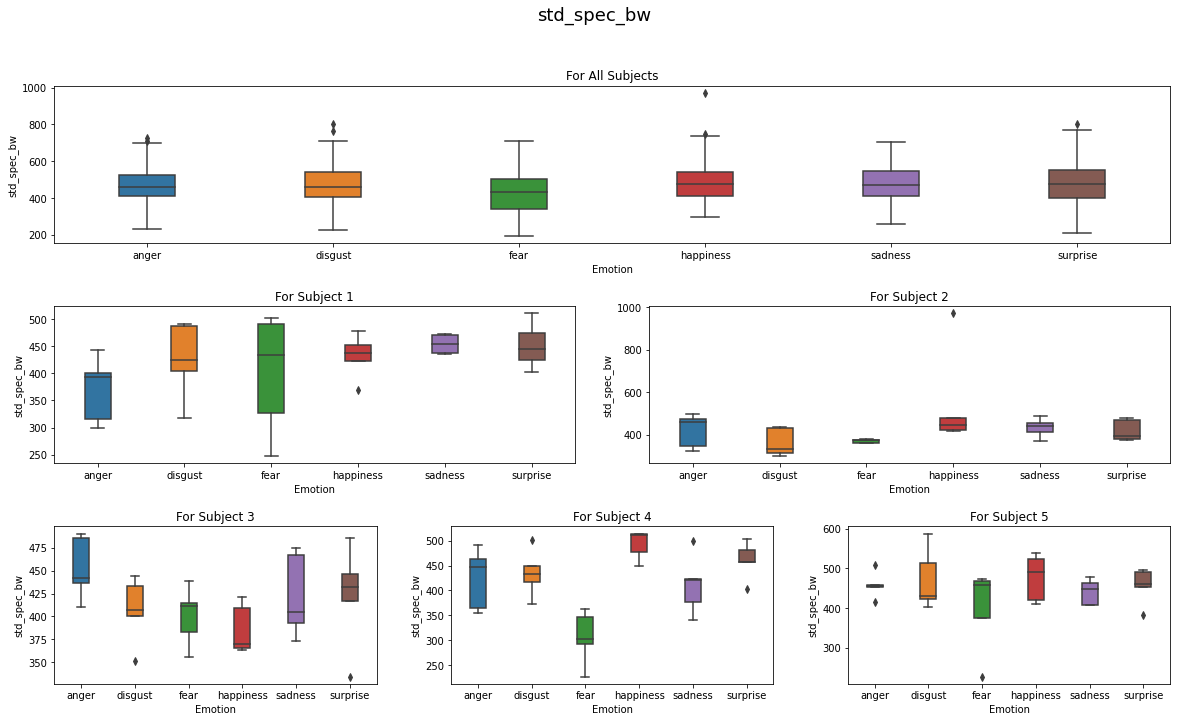

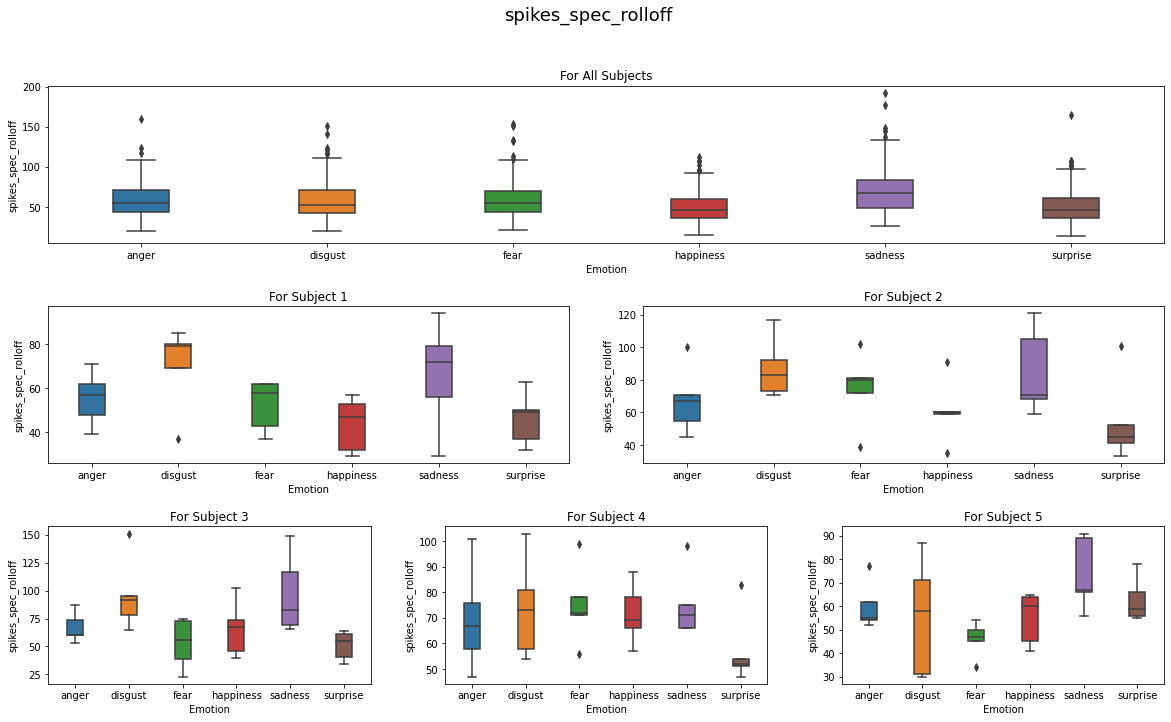

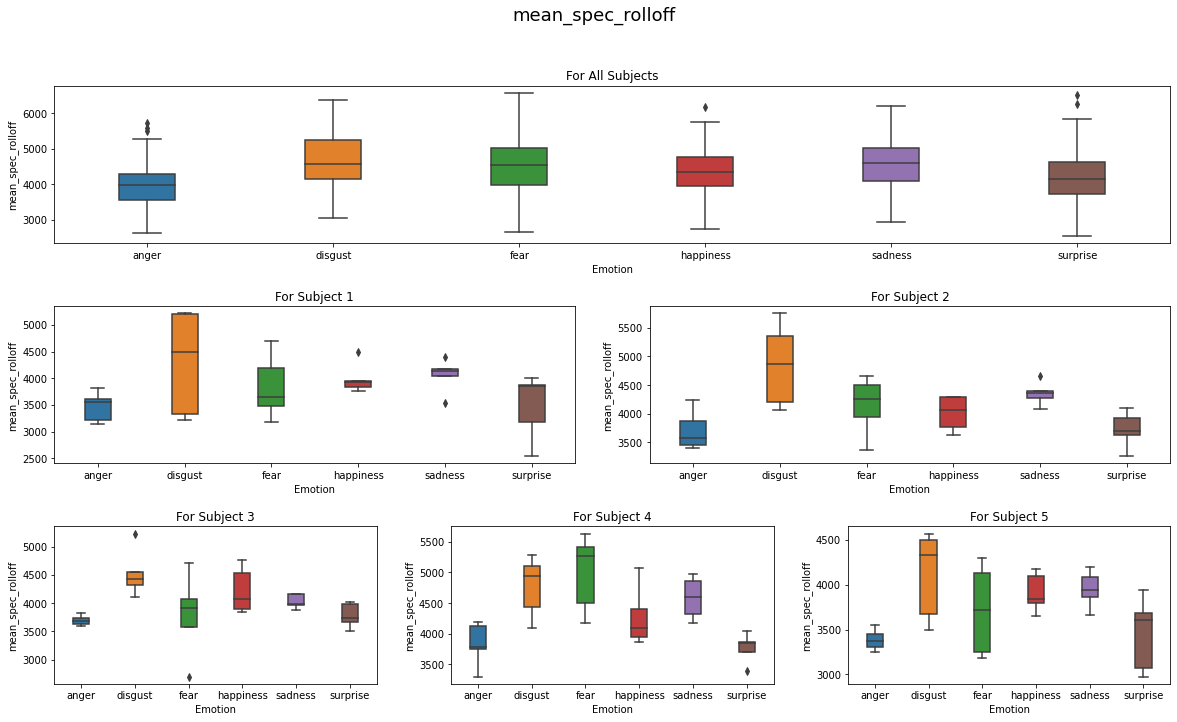

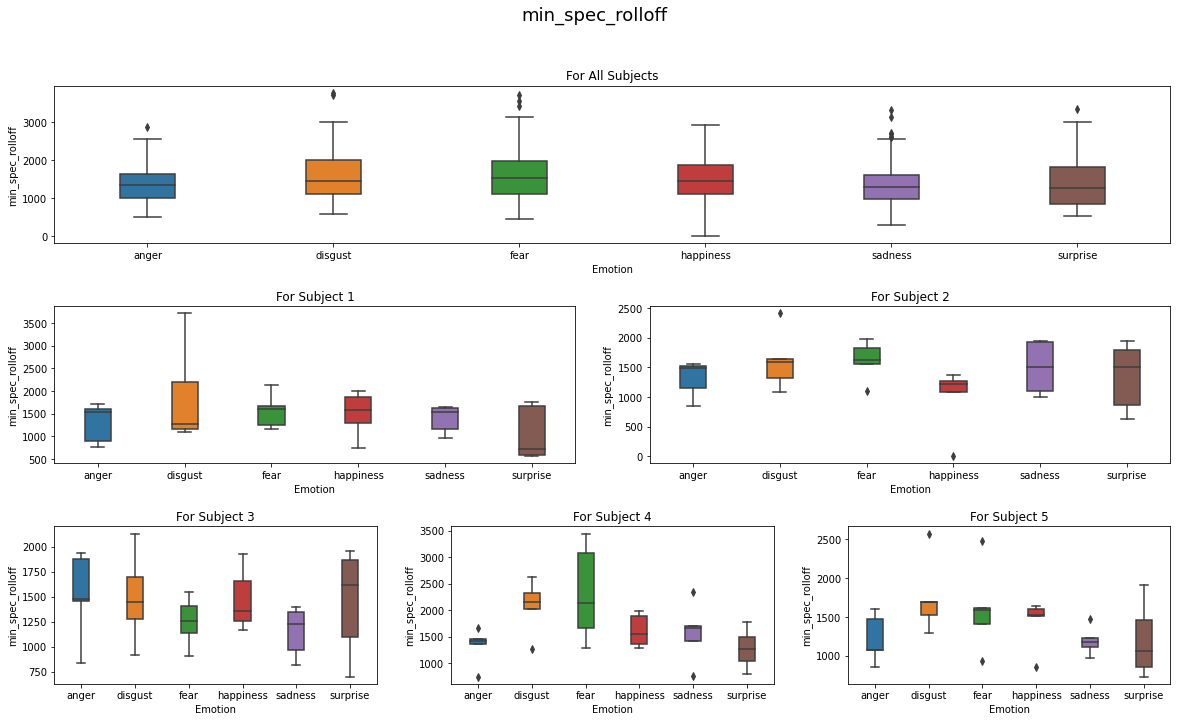

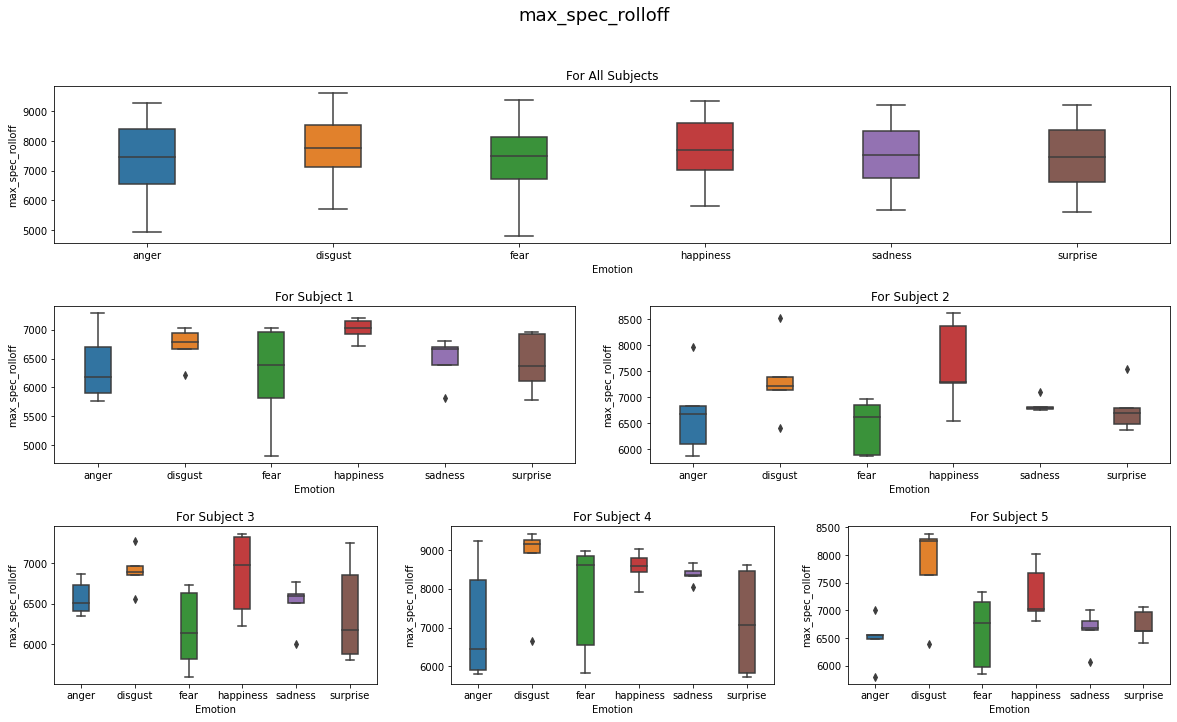

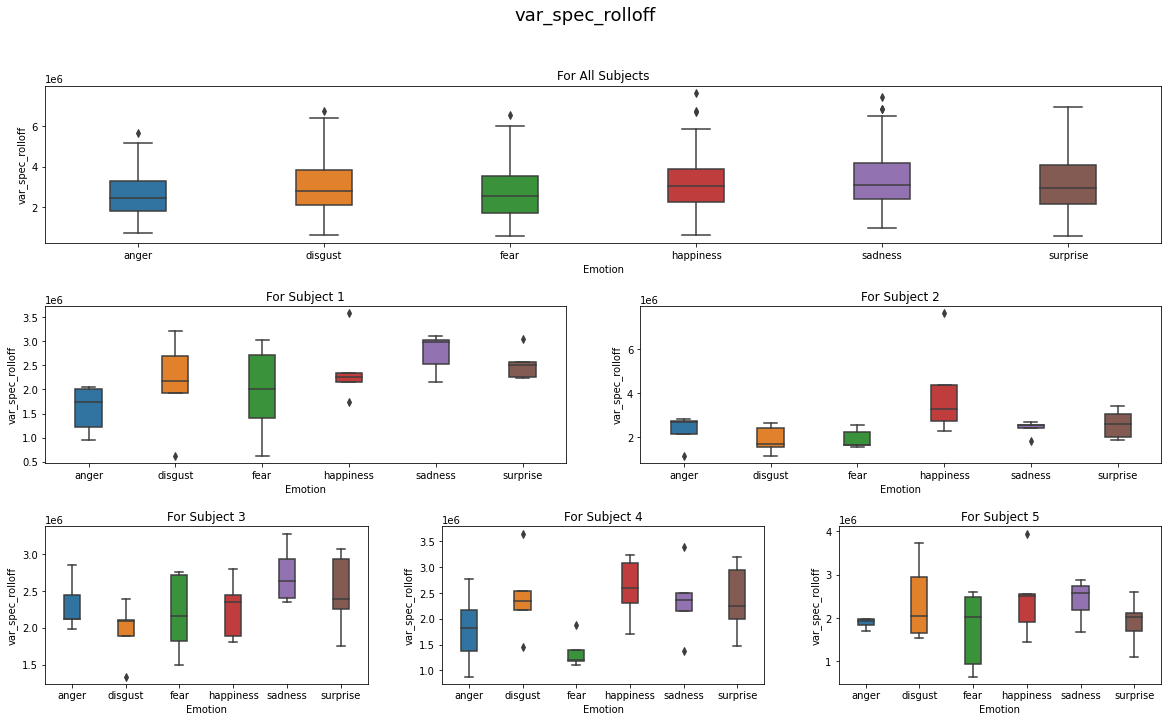

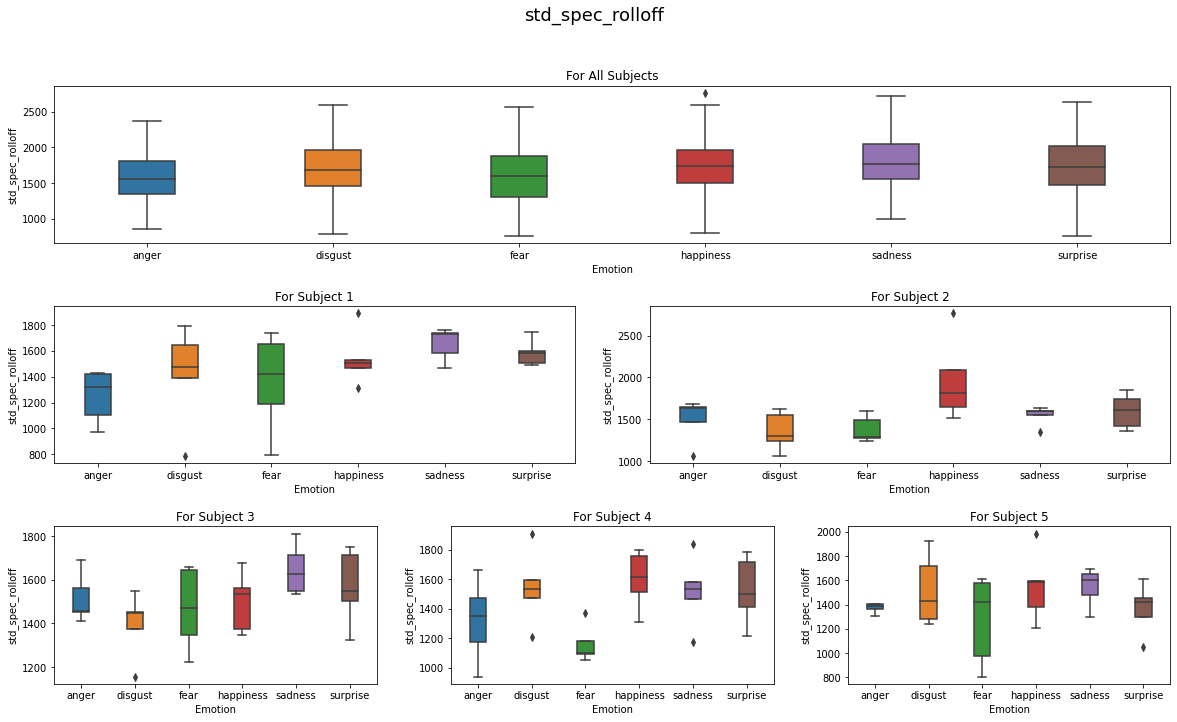

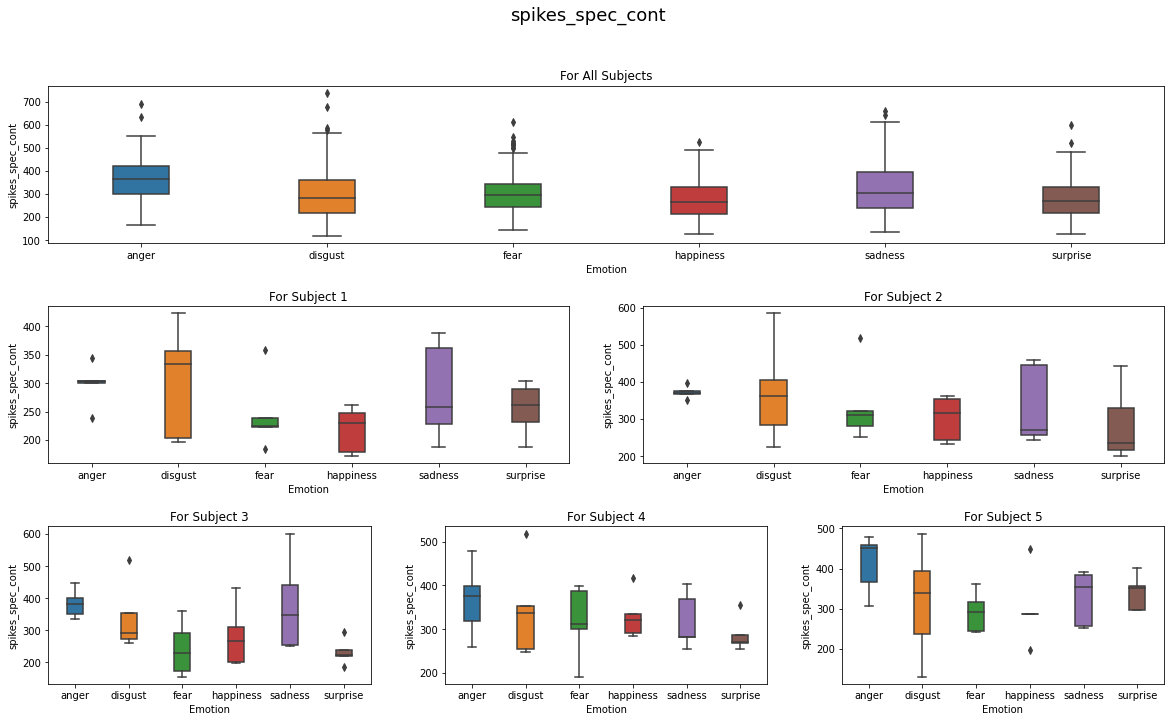

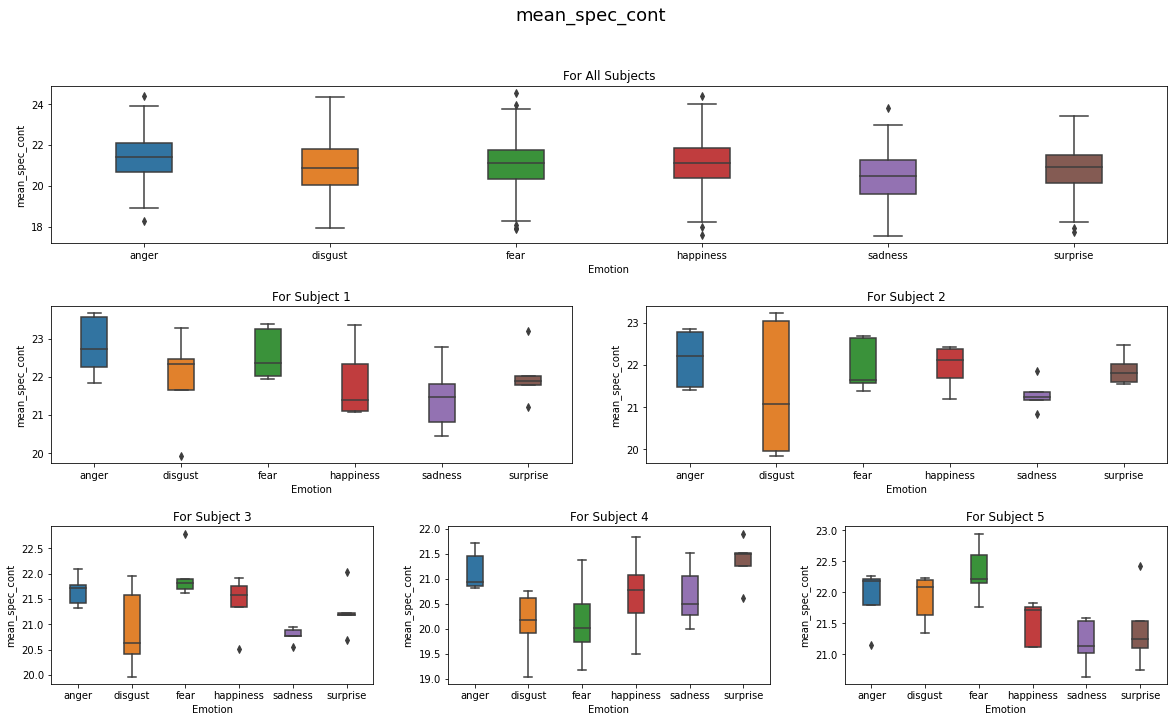

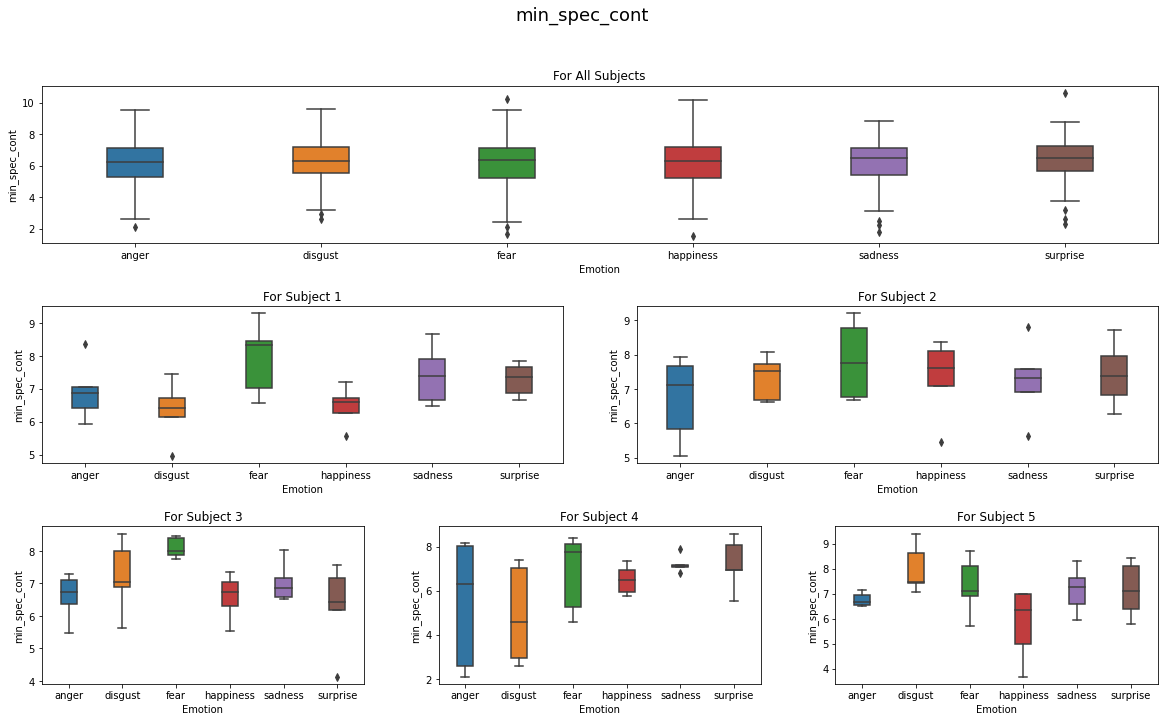

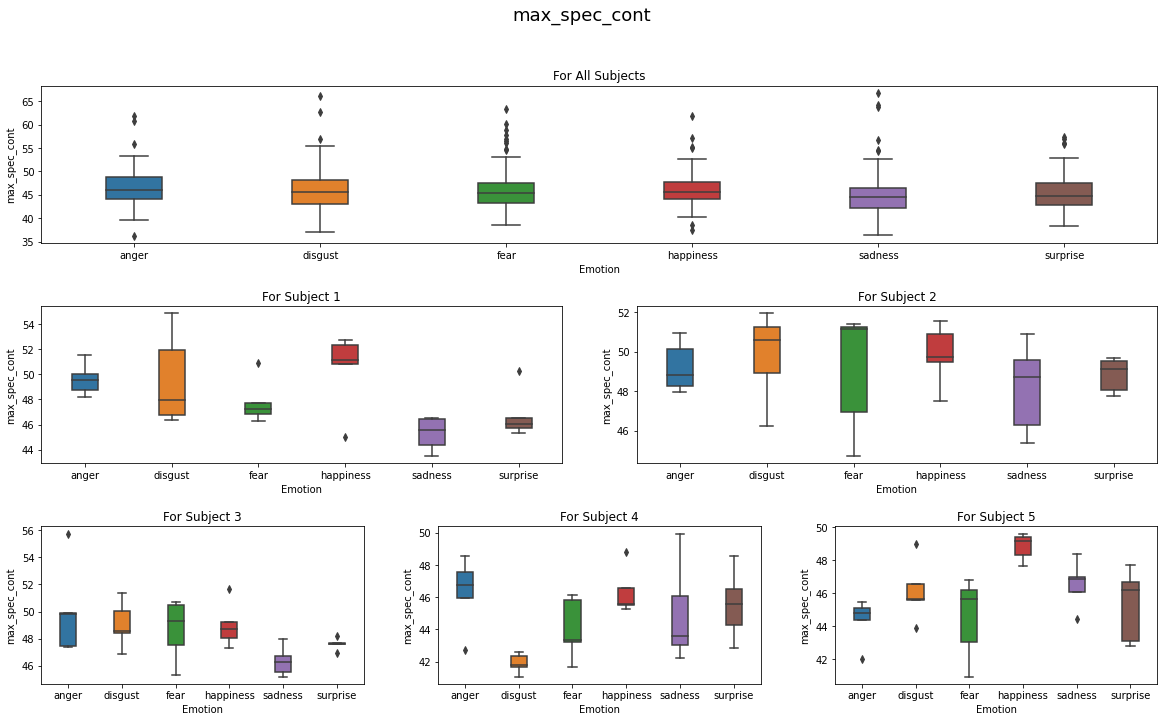

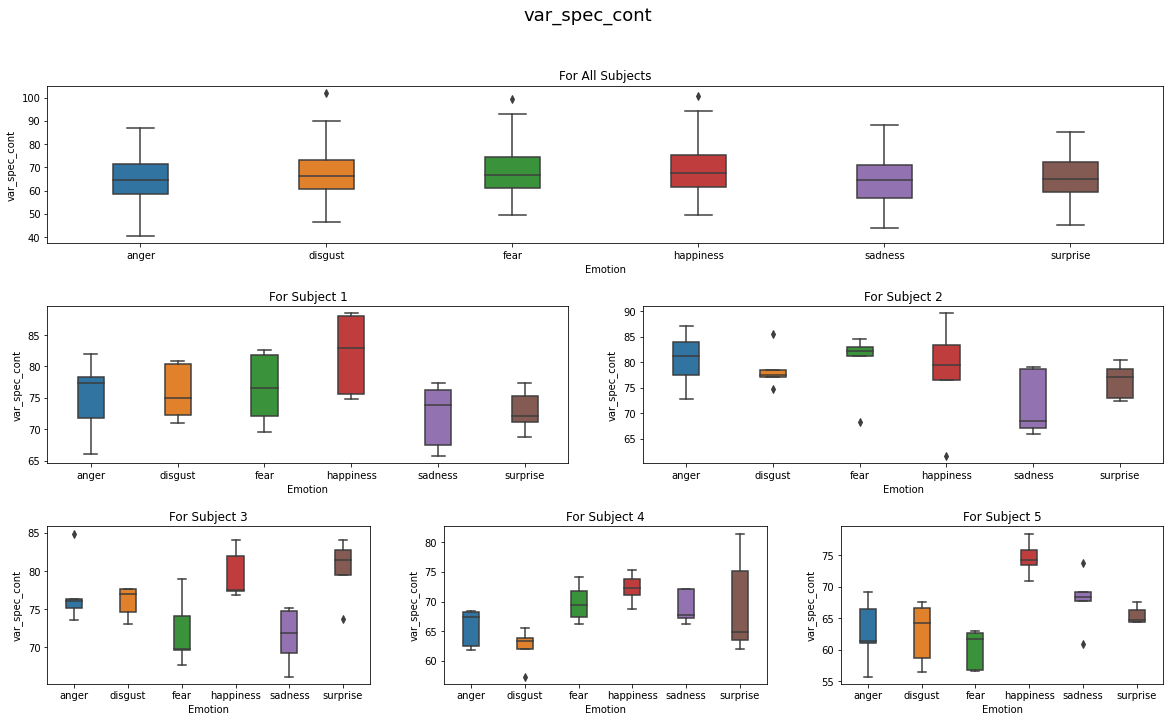

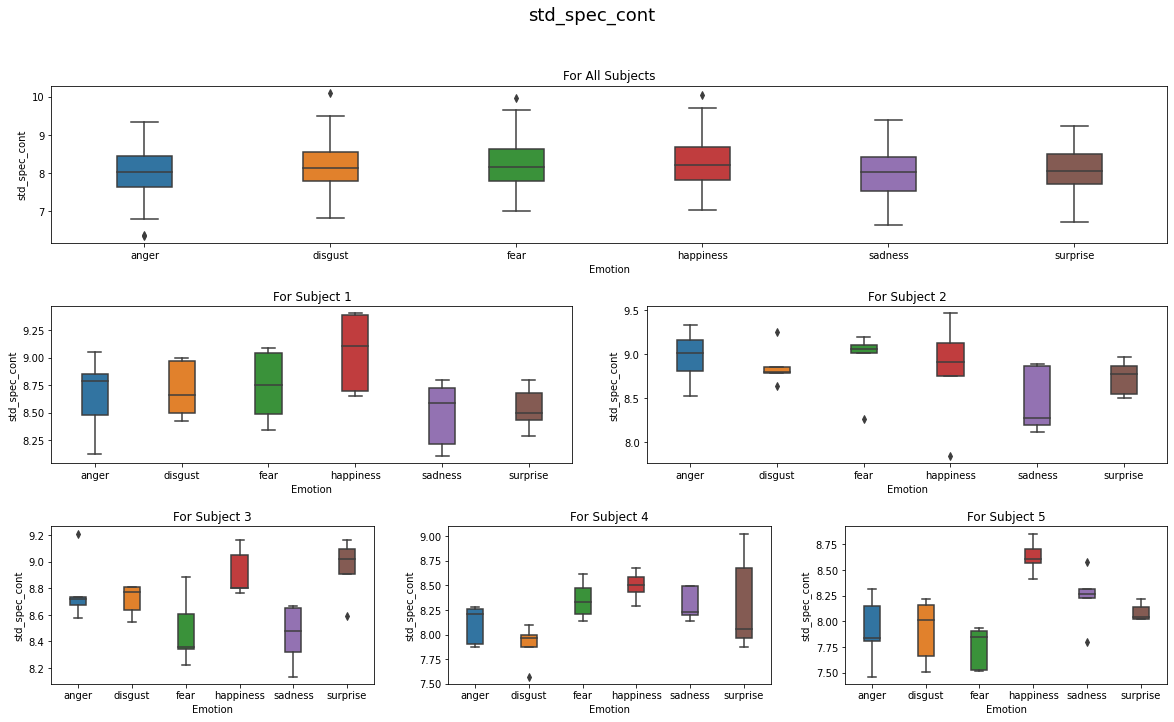

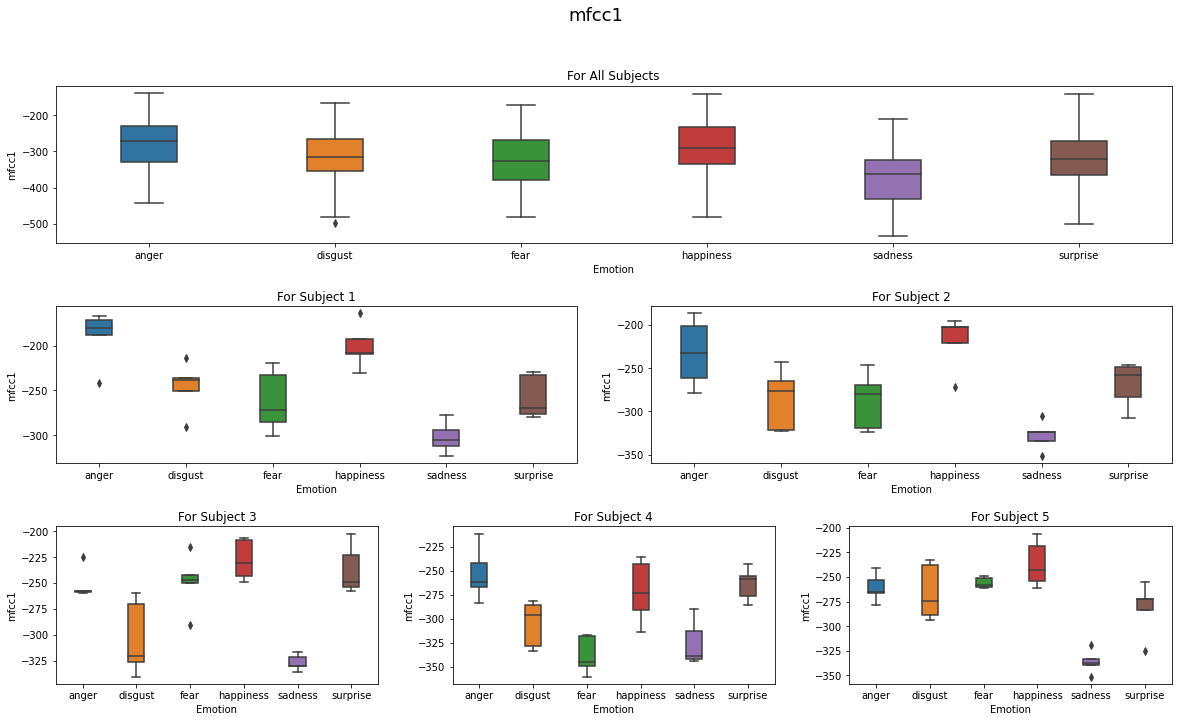

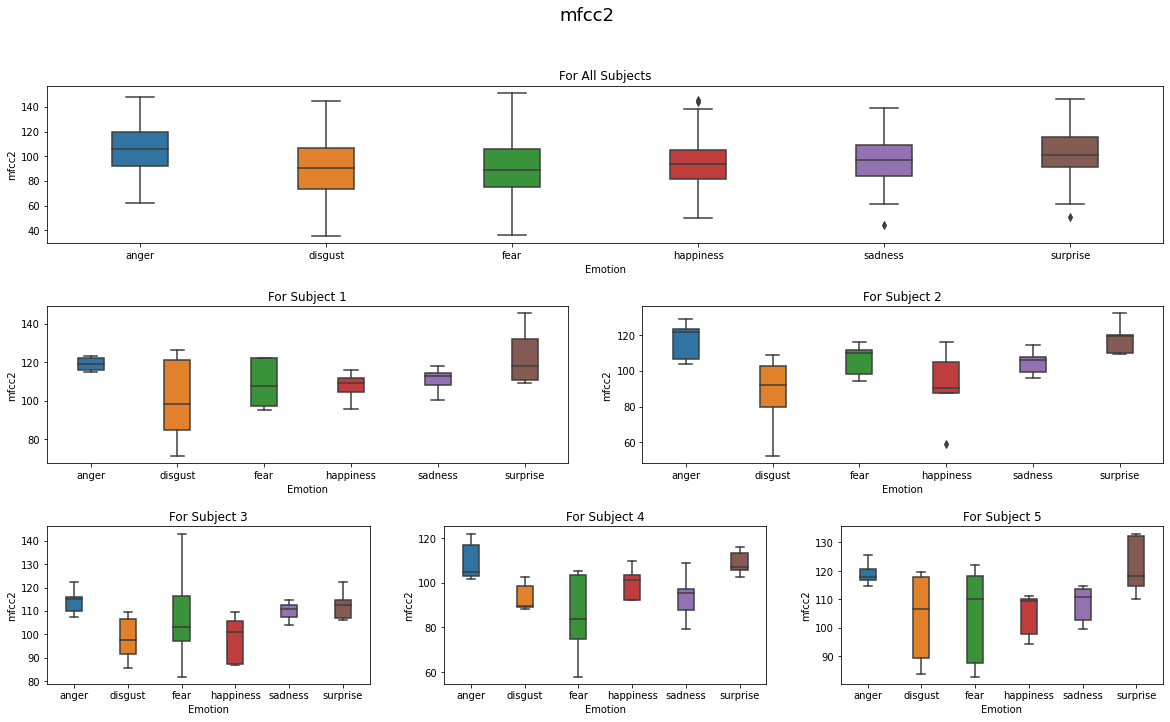

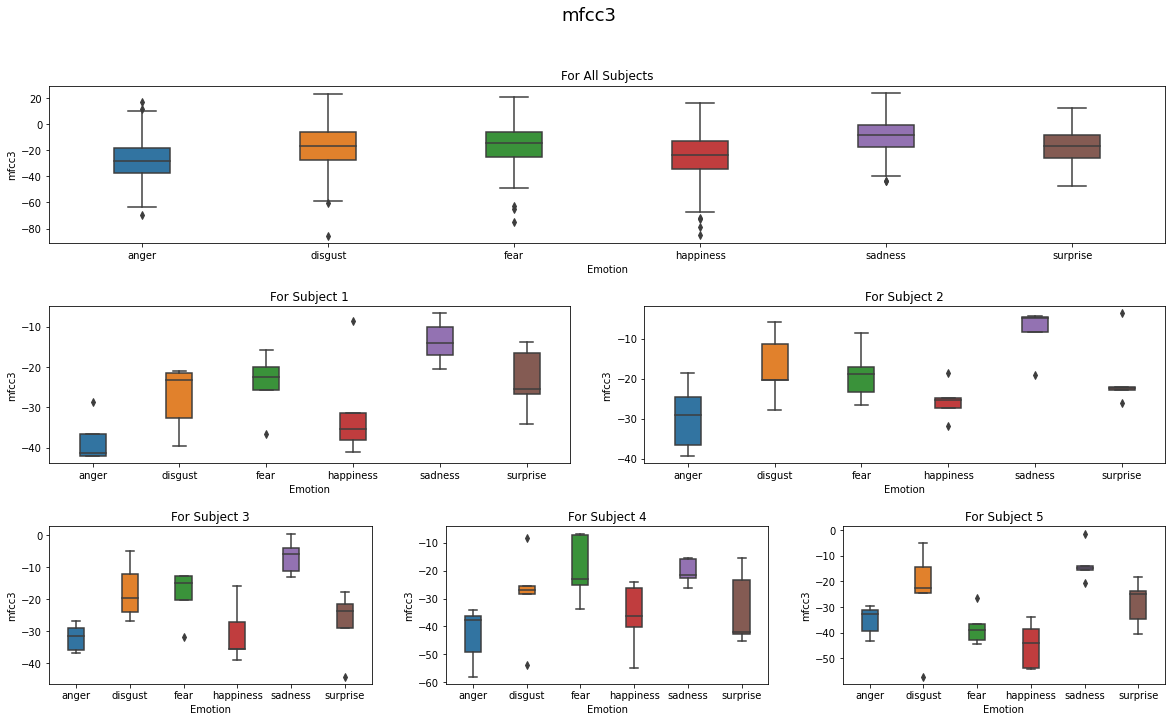

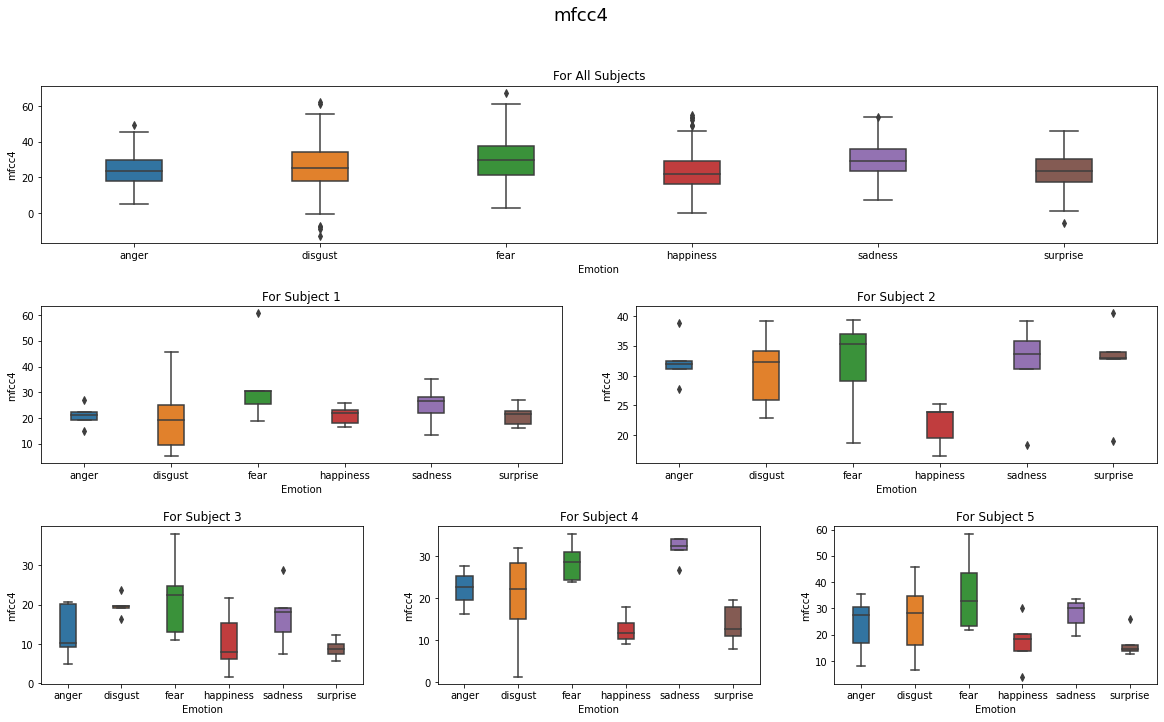

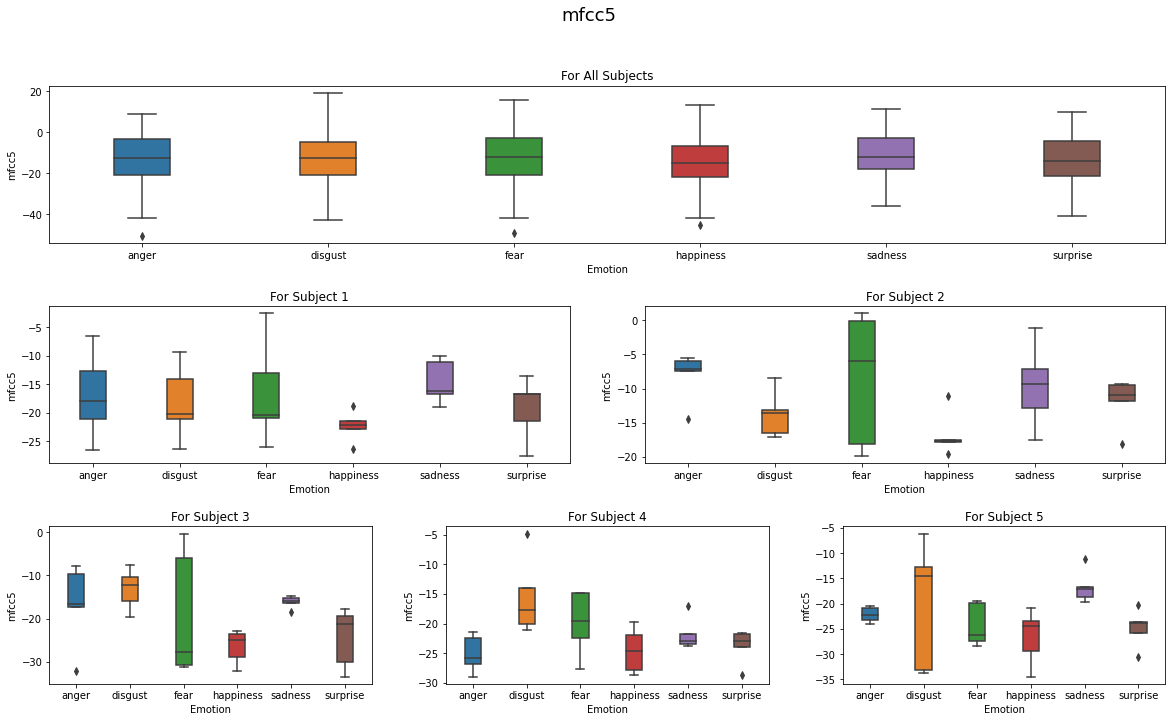

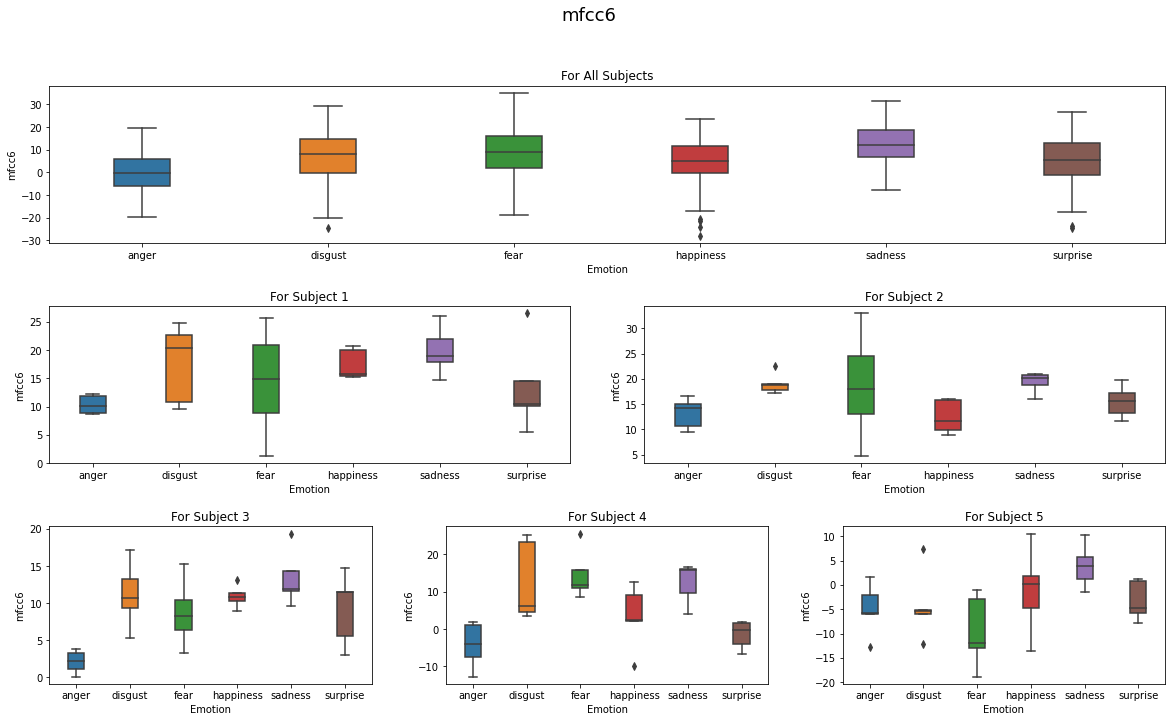

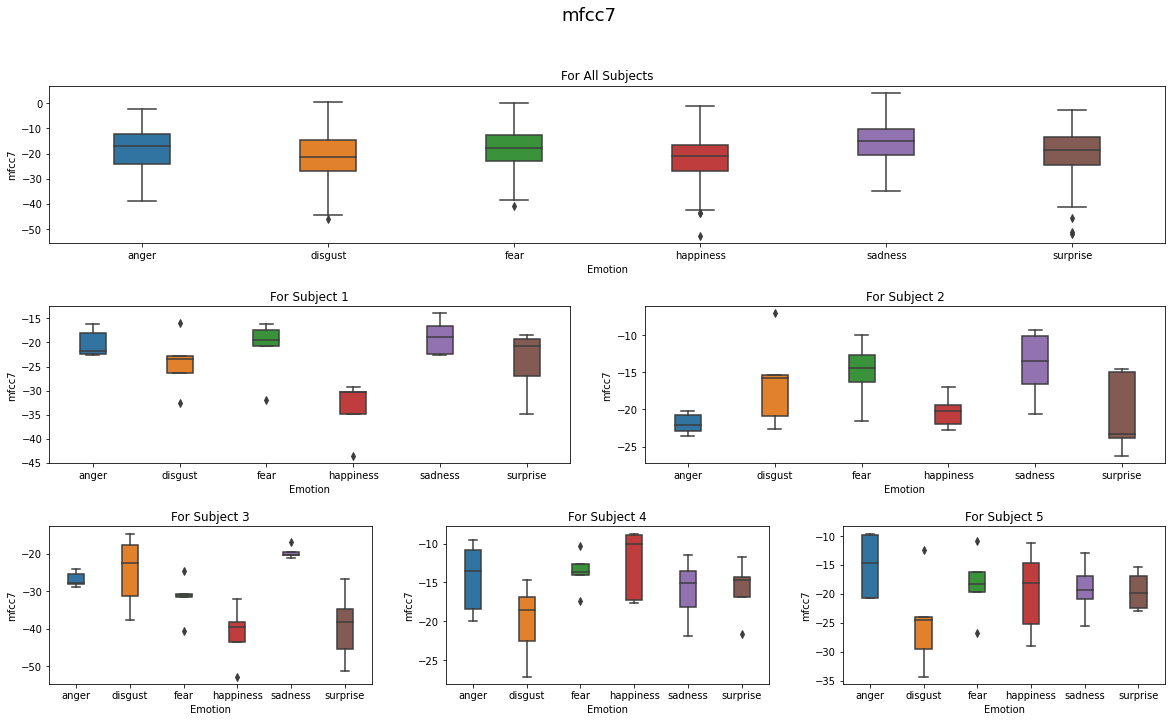

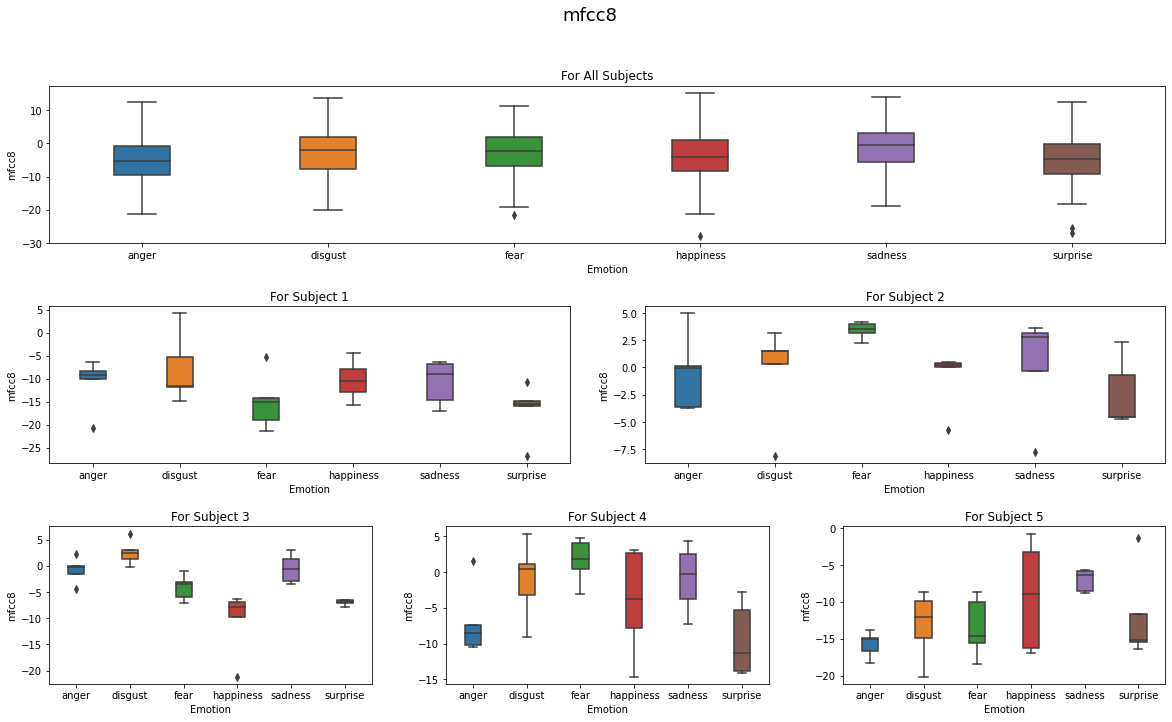

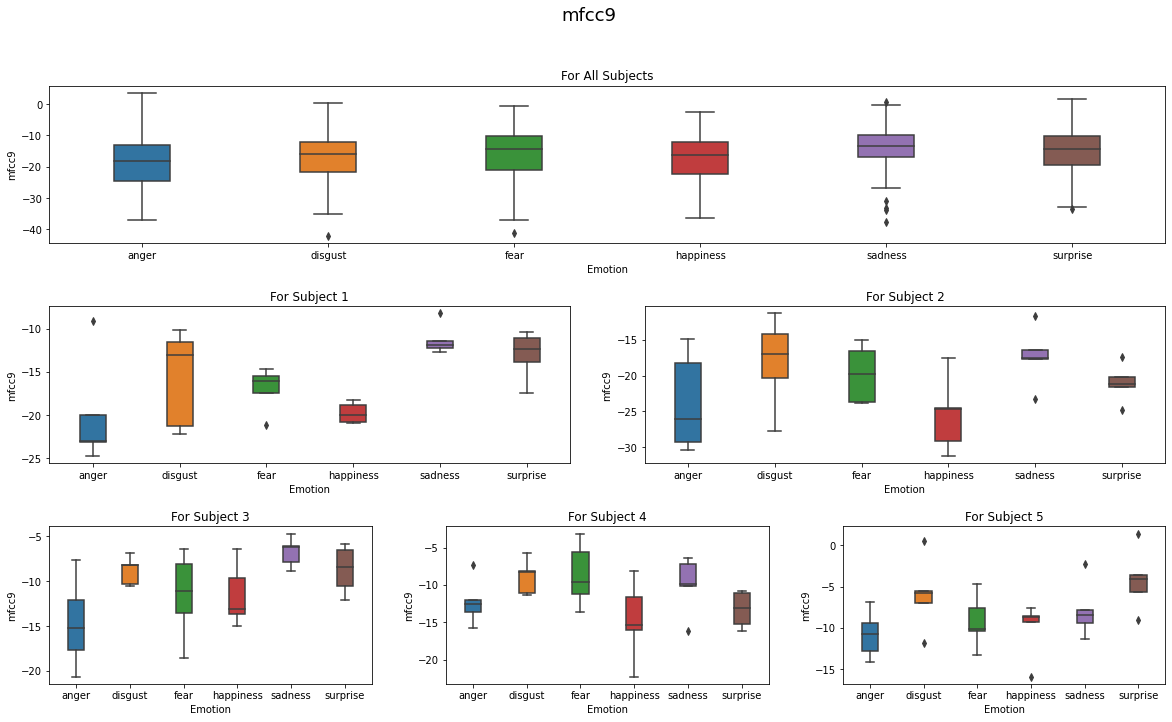

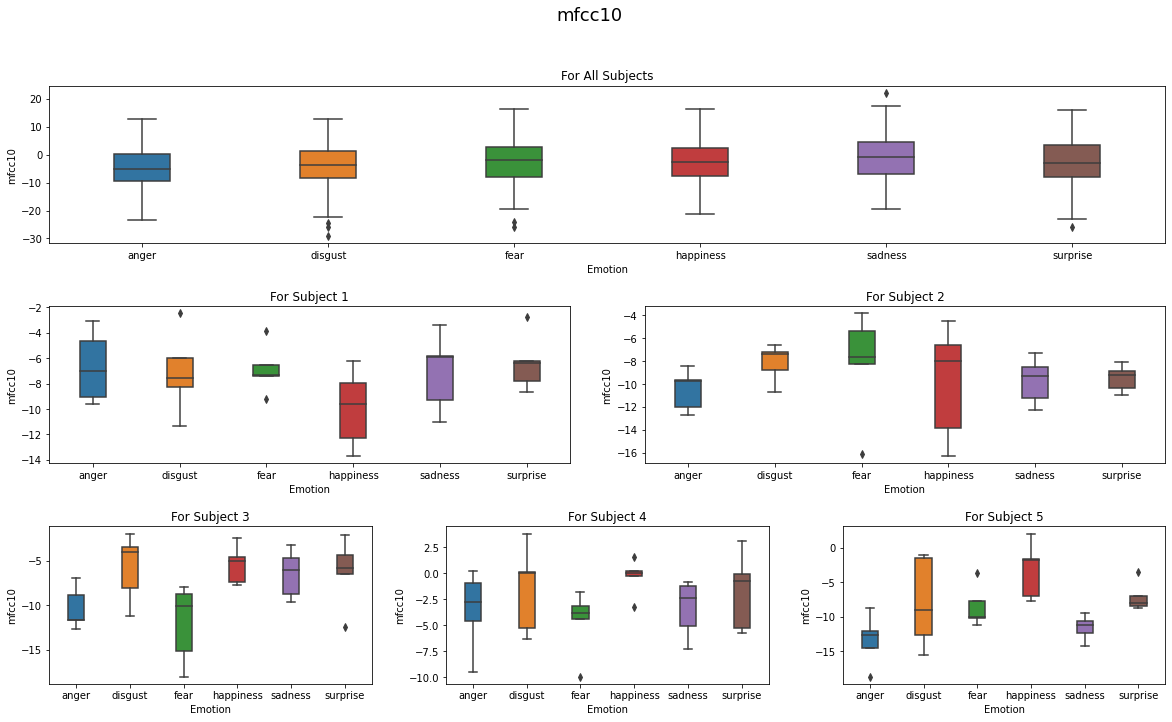

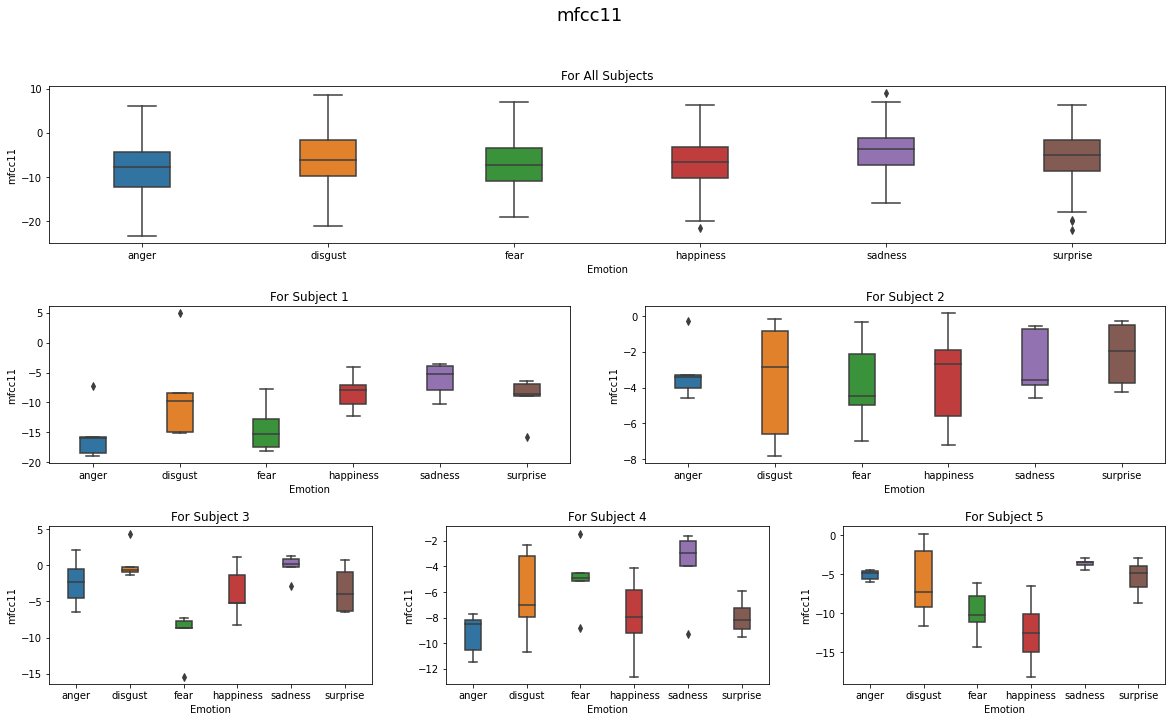

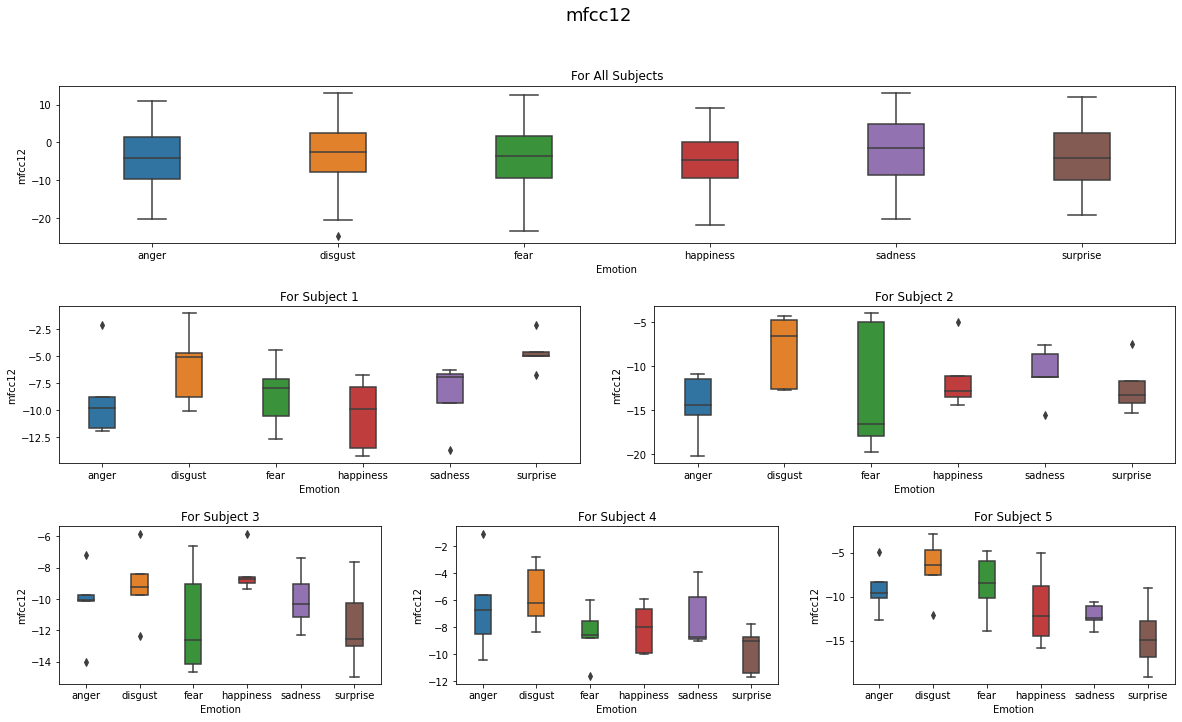

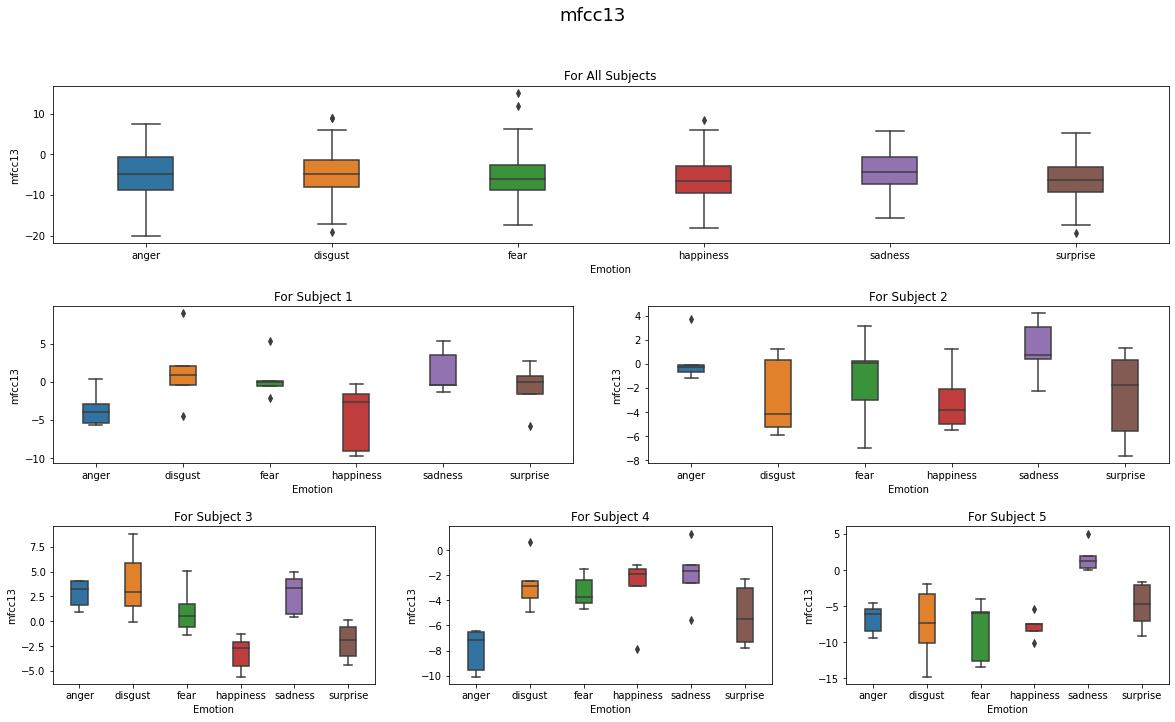

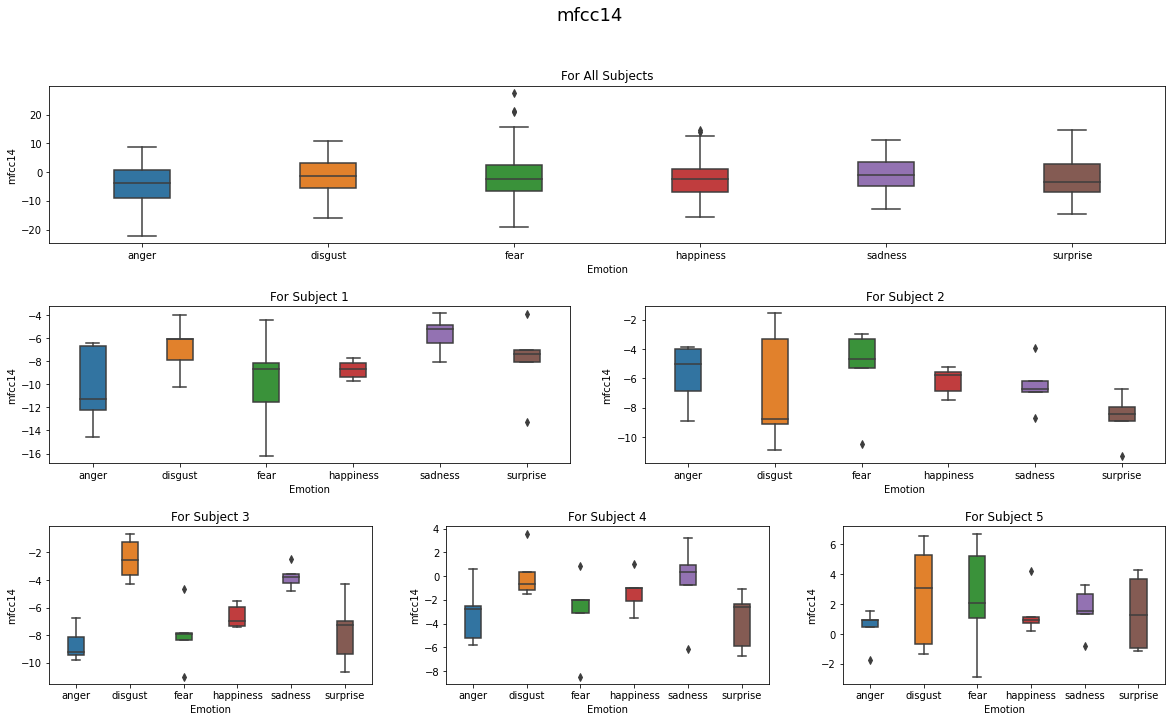

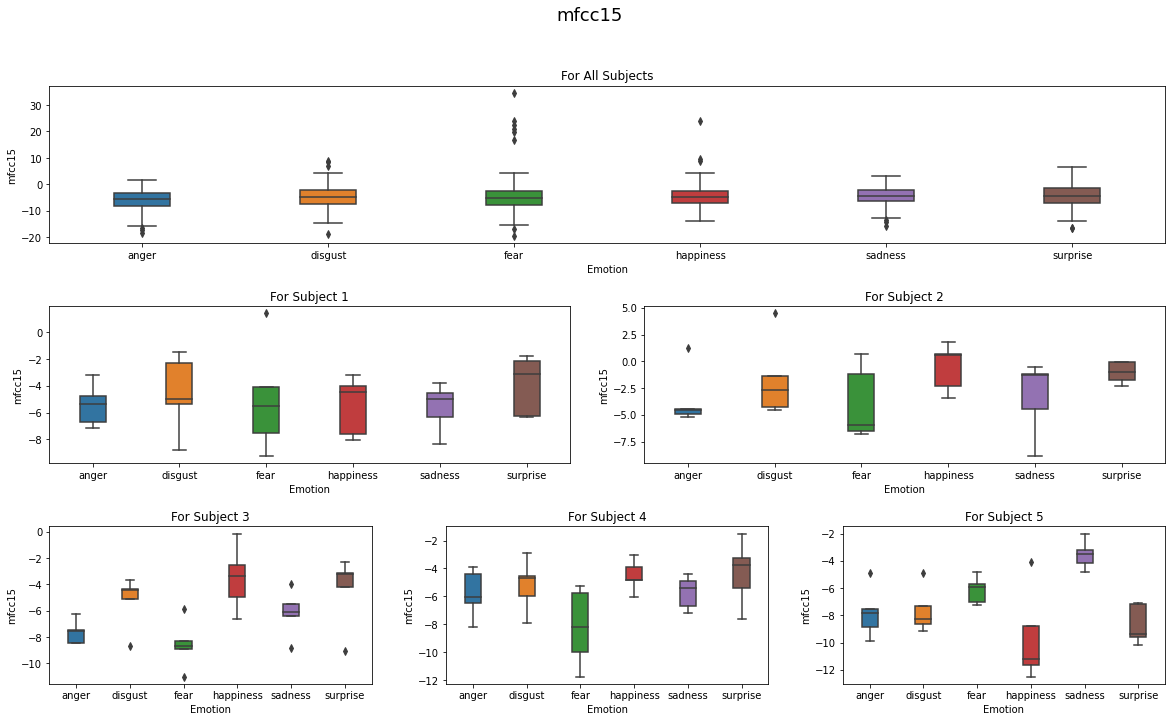

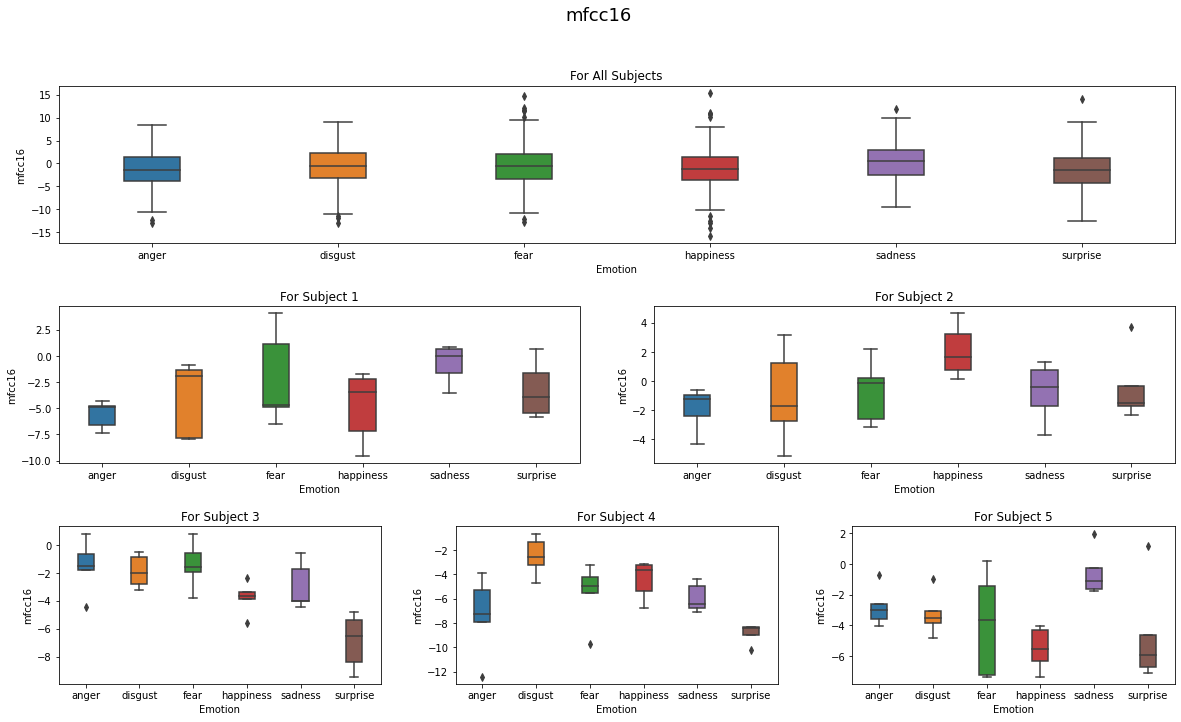

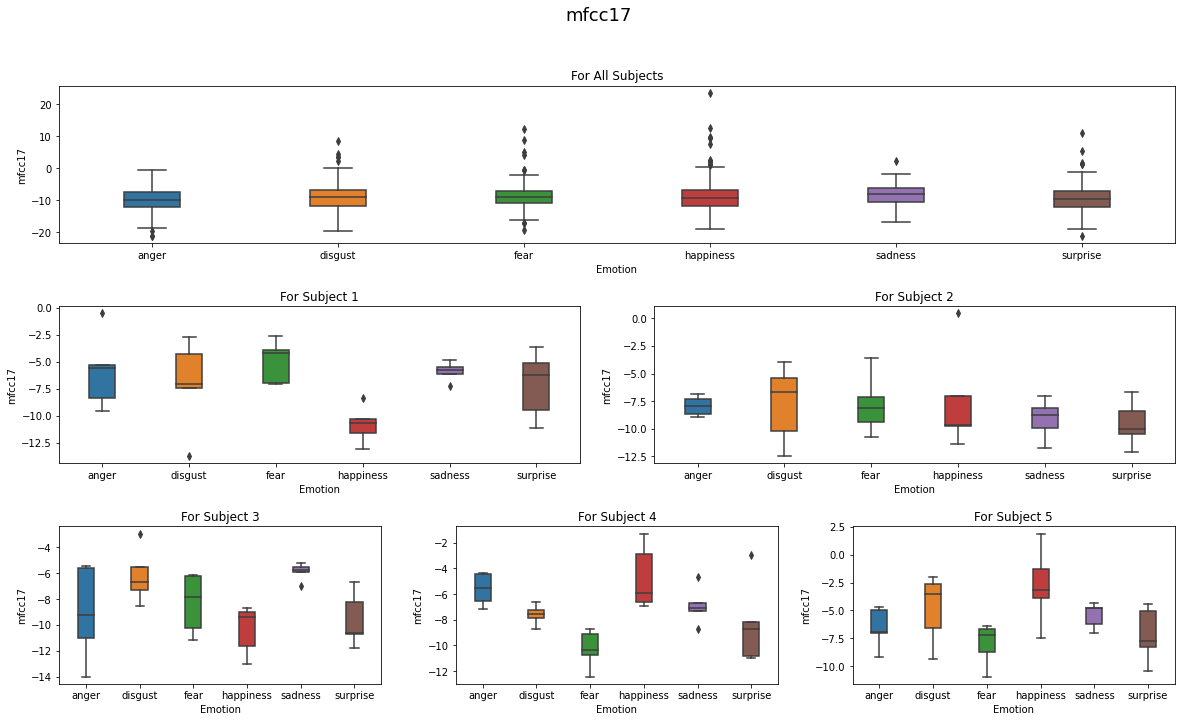

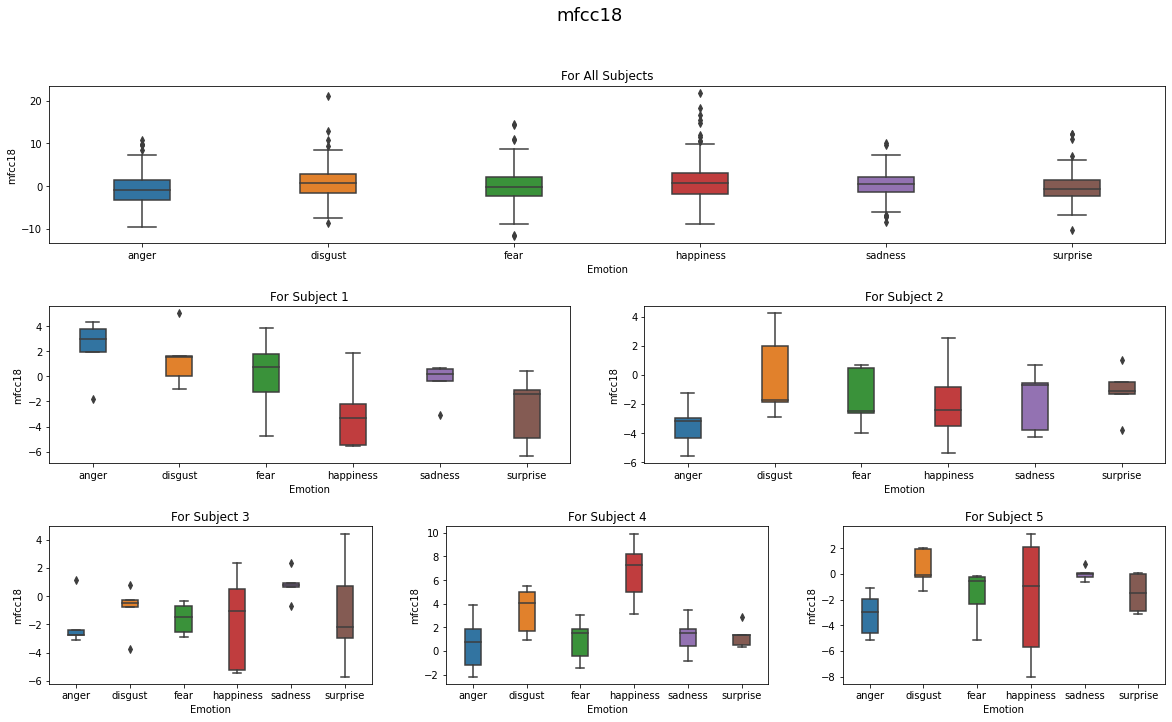

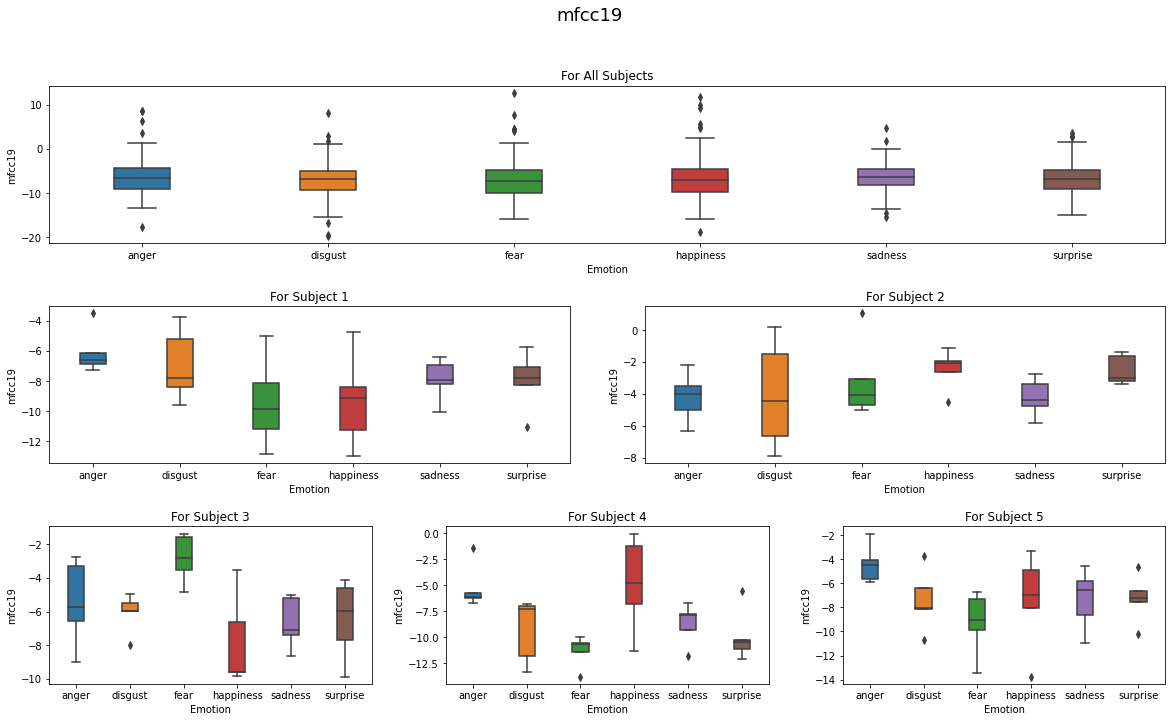

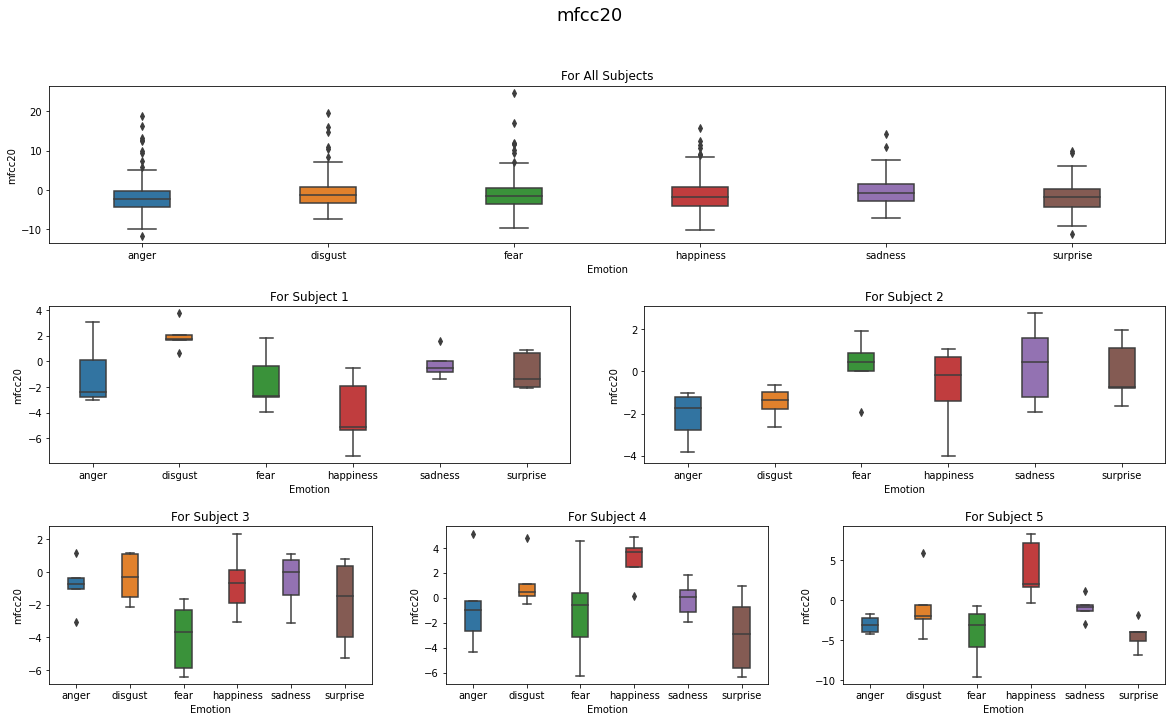

In [19]:
for feature in df.columns[4:]:
    if '_zcr' not in feature:
        analyse_feature(df, feature)